In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
merged_df = pd.read_csv("merged_data/merged_data.csv")
per_million_df = pd.read_csv("merged_data/merged_per_million.csv")
merged_df_index = pd.read_csv("merged_data/merged_data_index.csv", index_col=0)
per_million_df_index = pd.read_csv("merged_data/merged_per_million_index.csv", index_col=0)


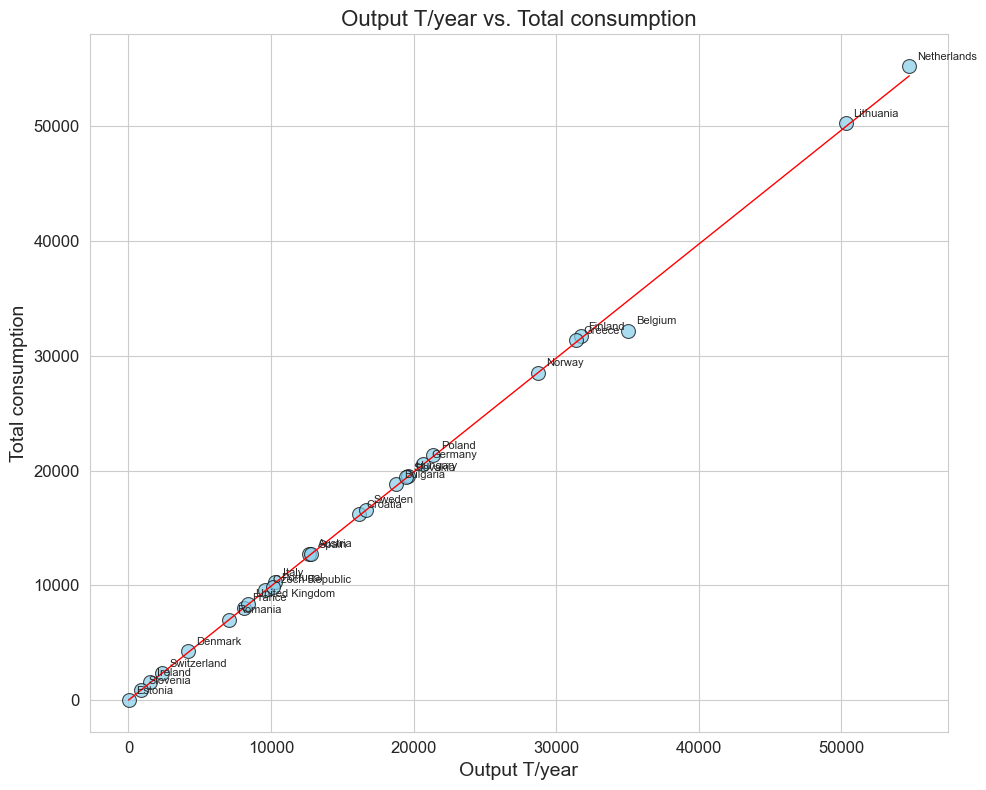

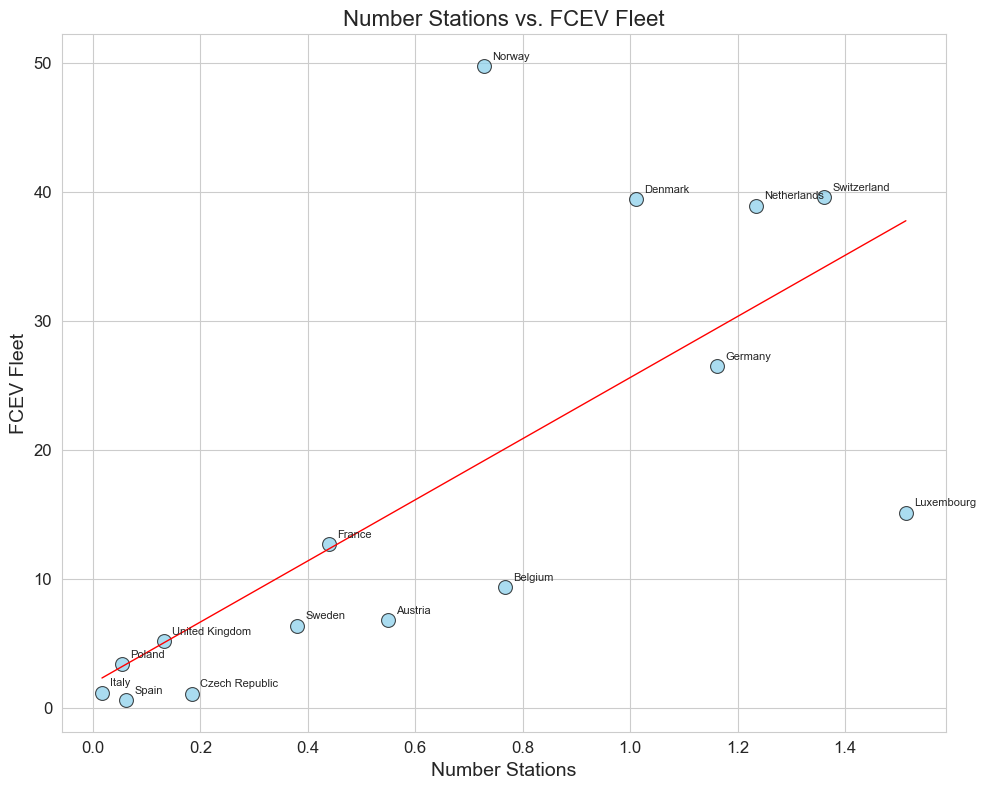

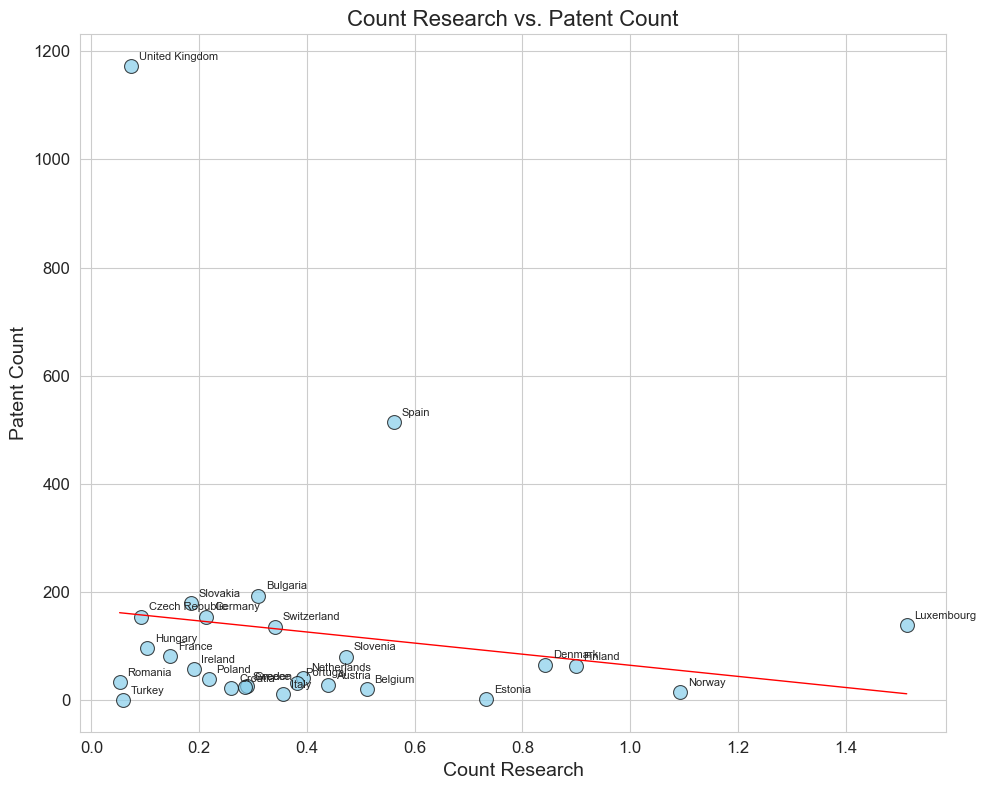

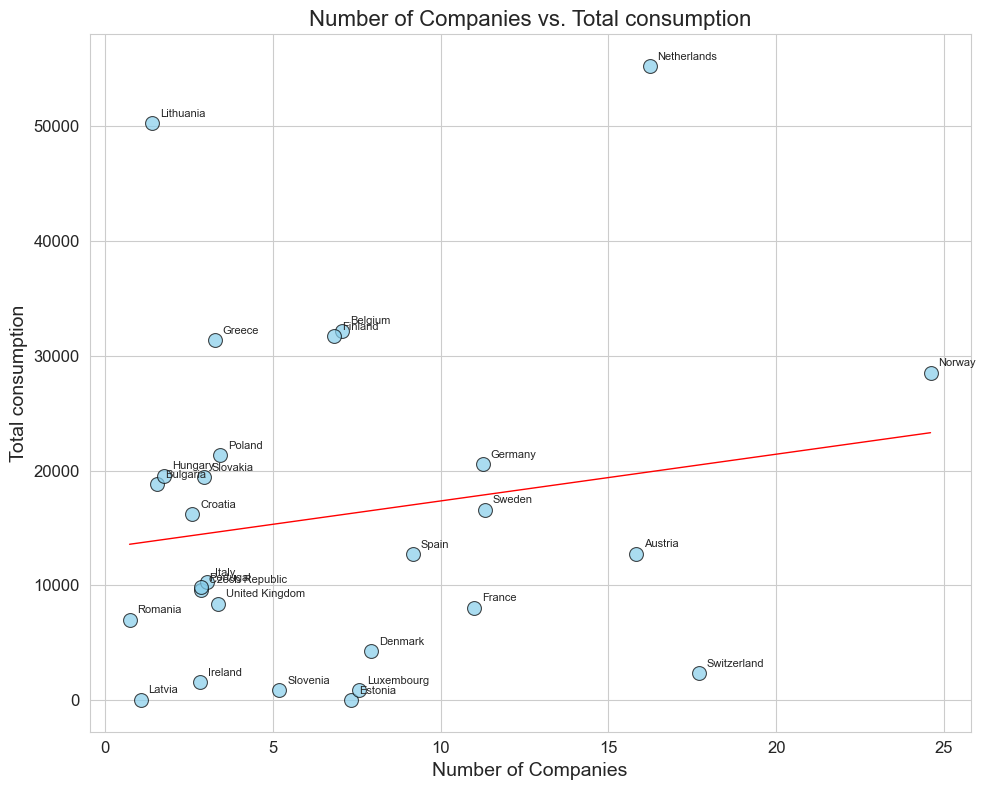

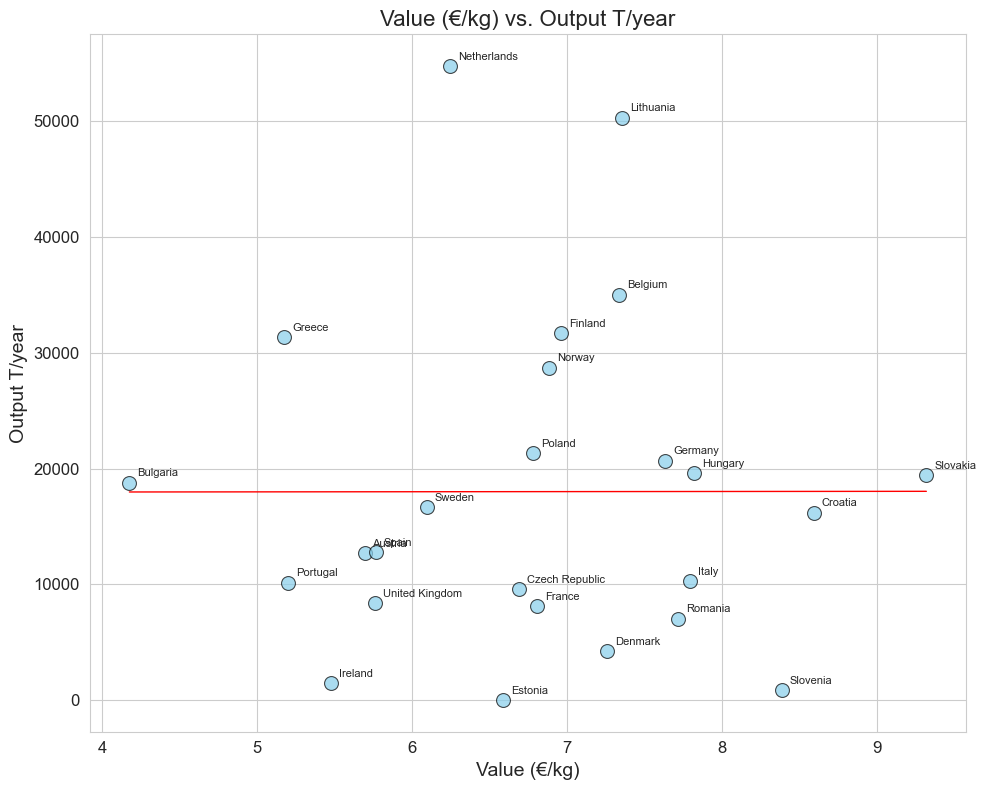

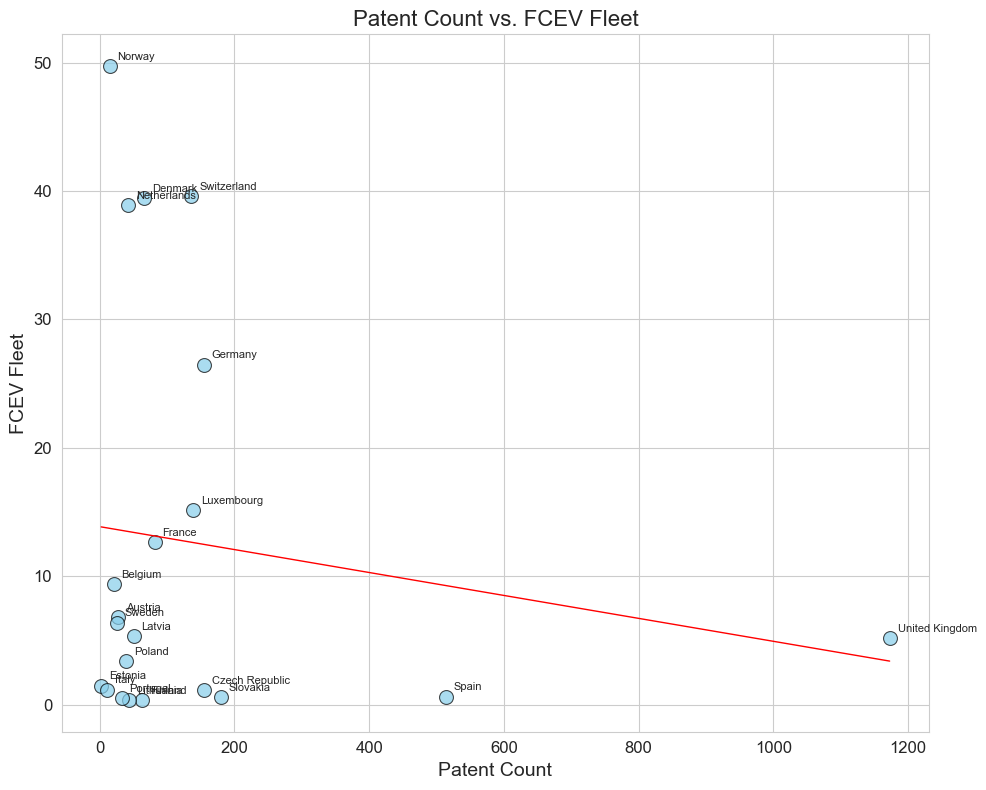

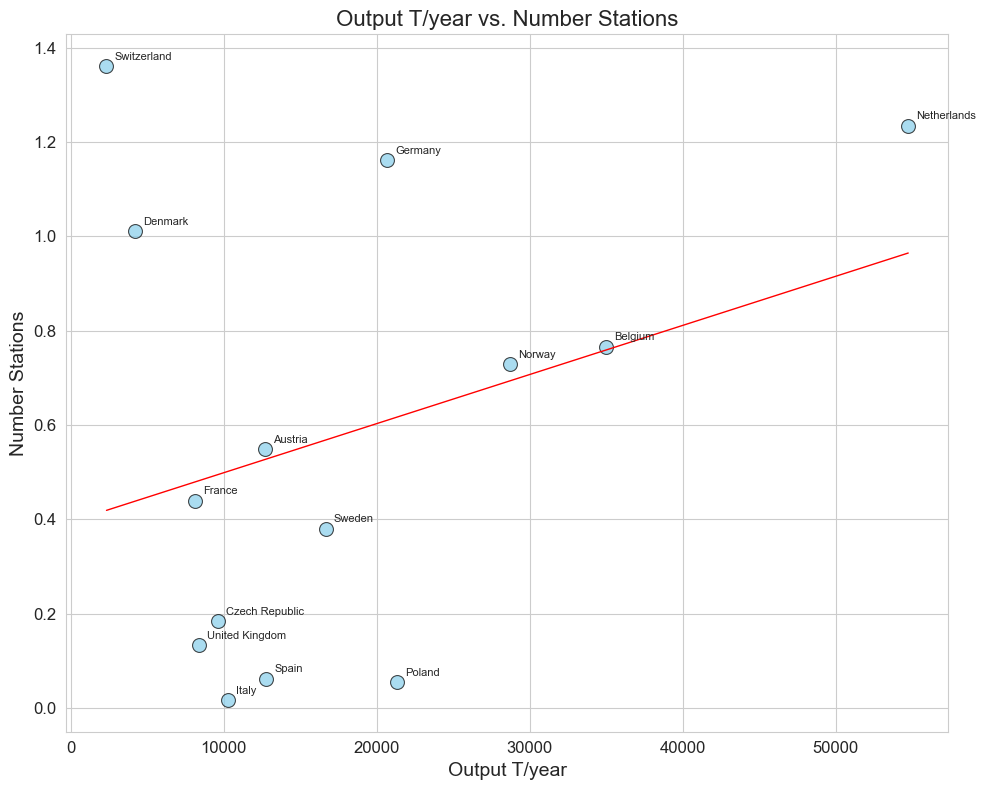

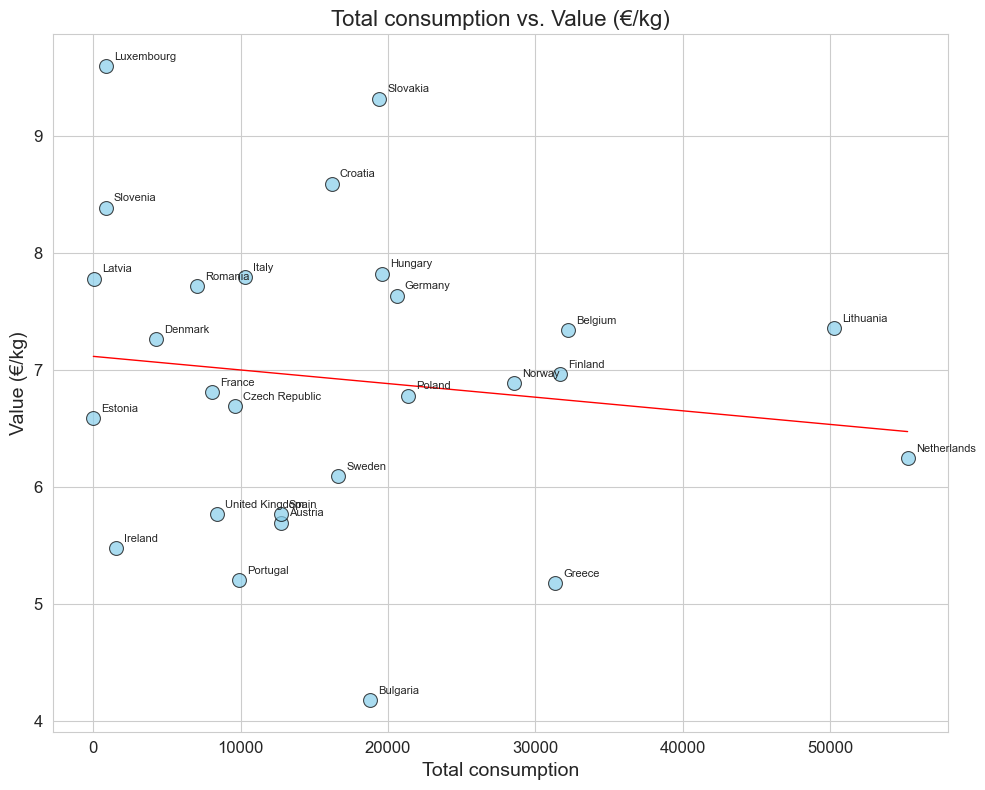

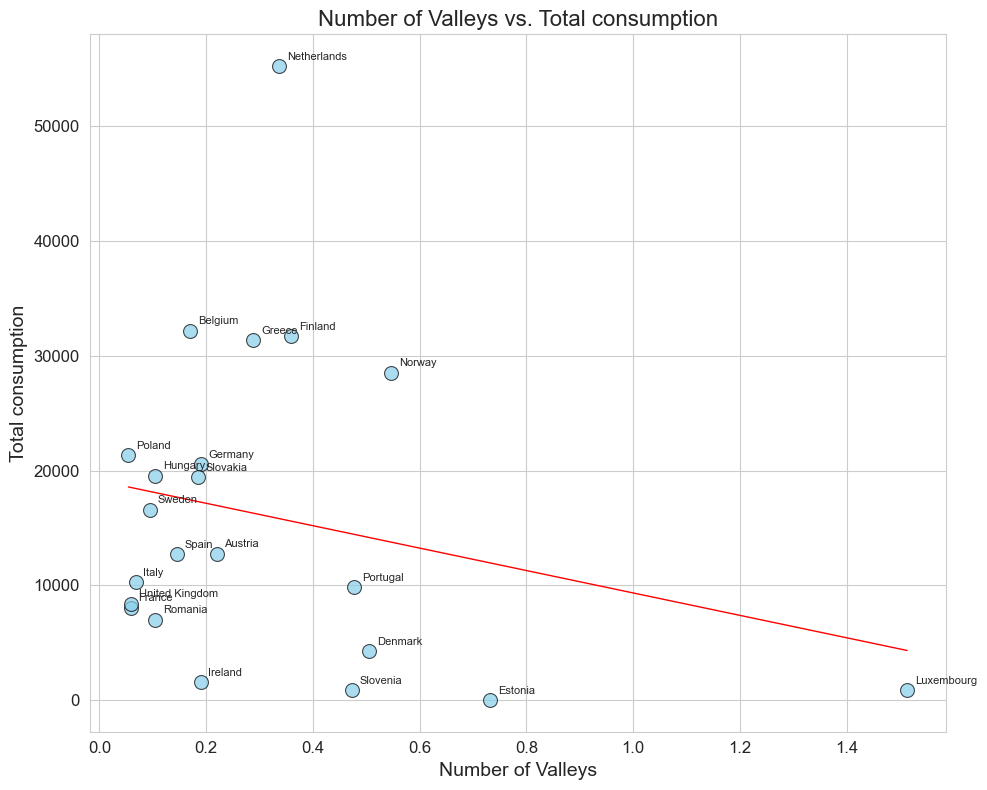

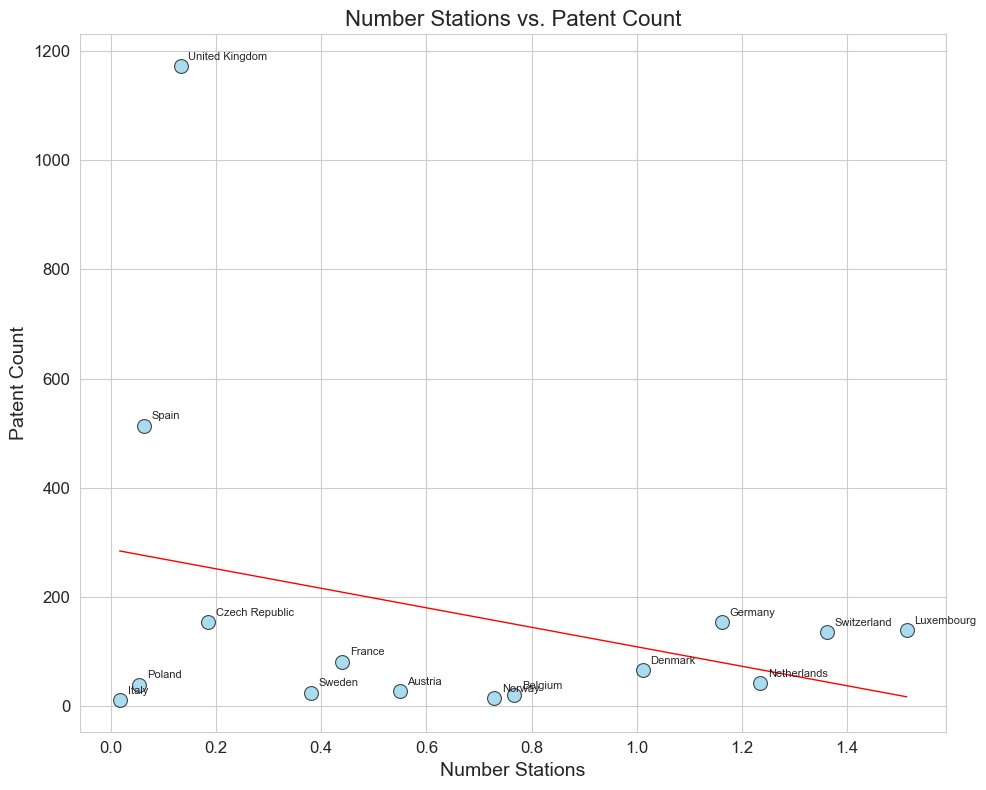

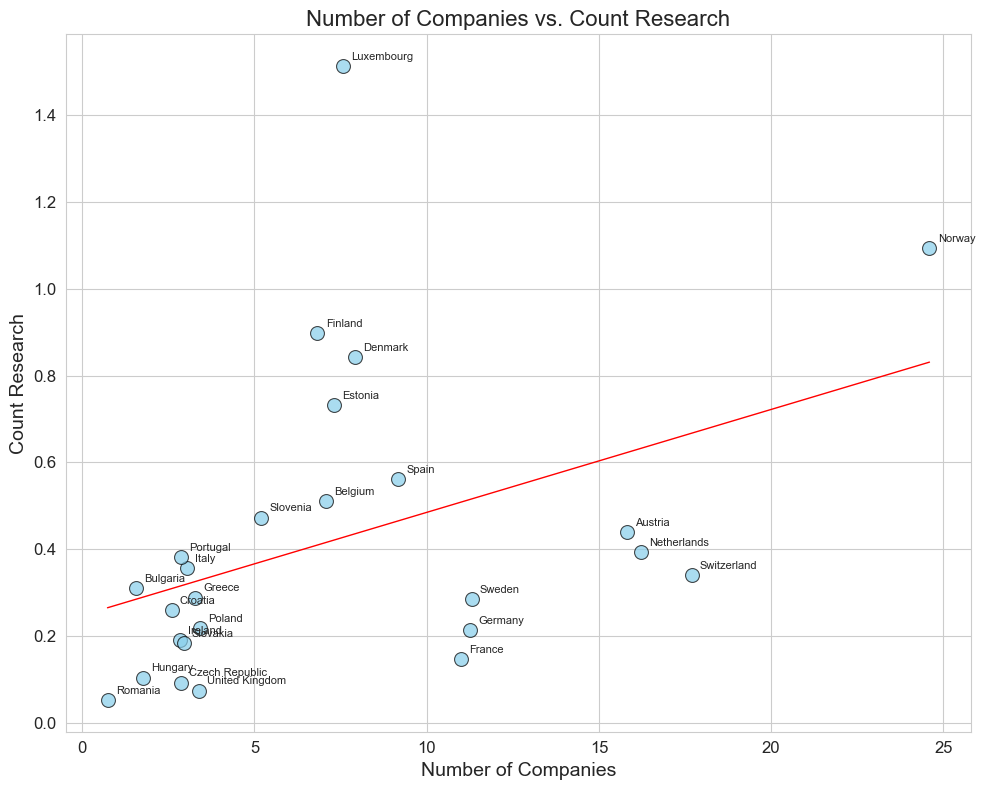

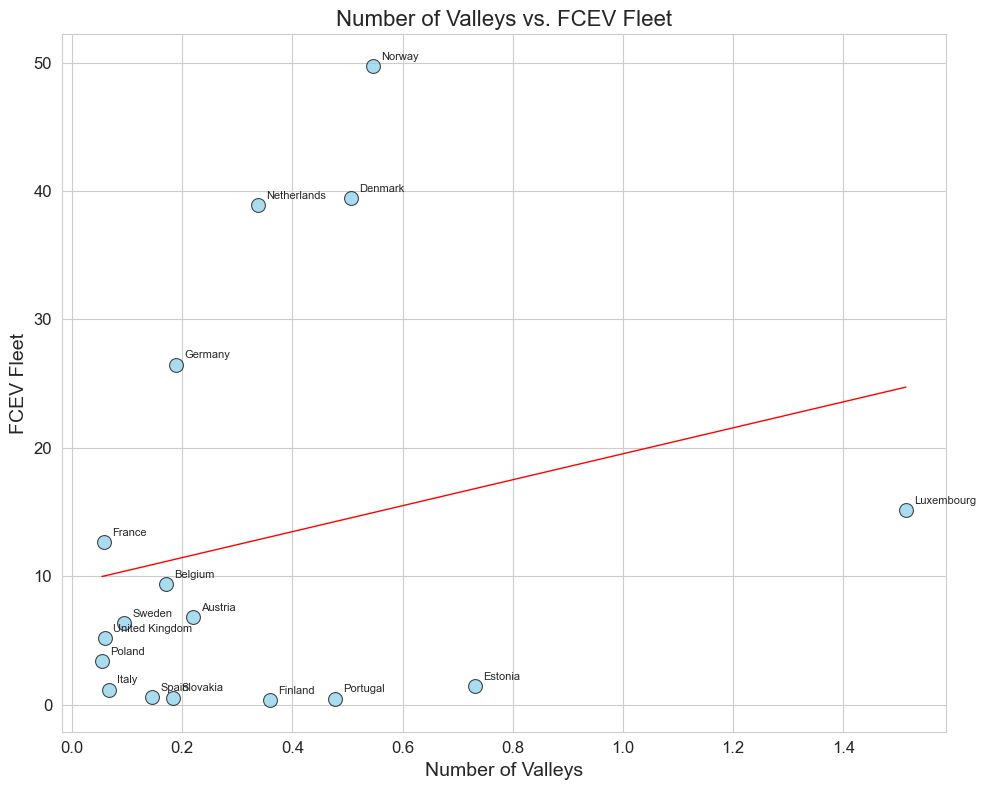

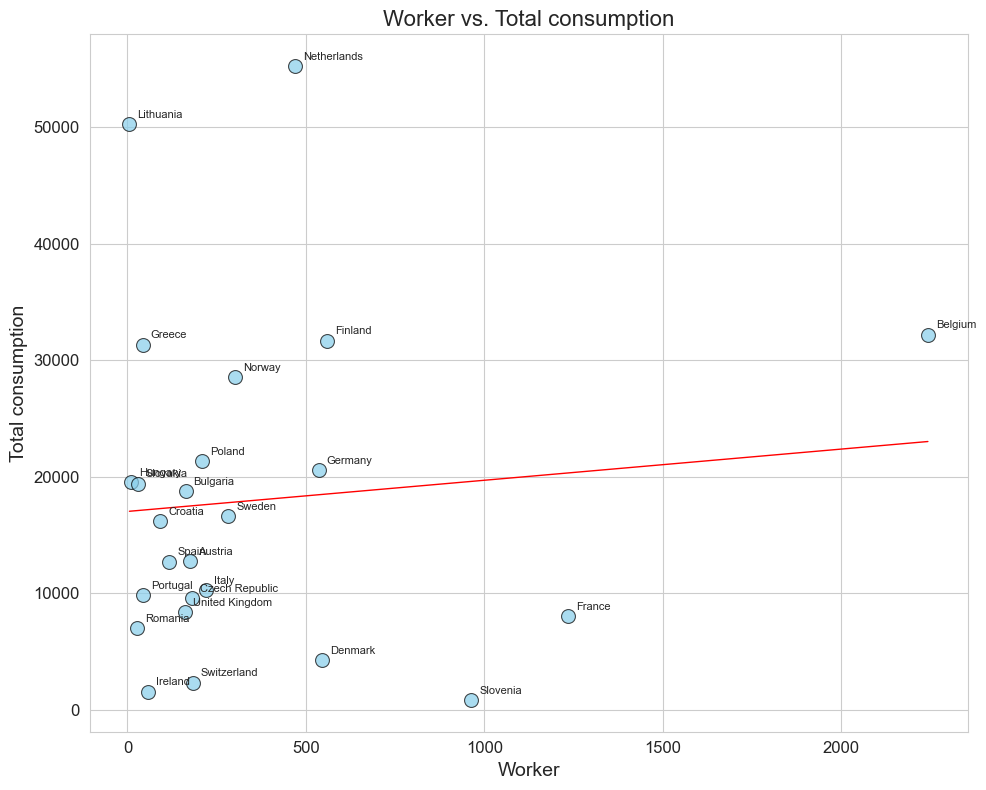

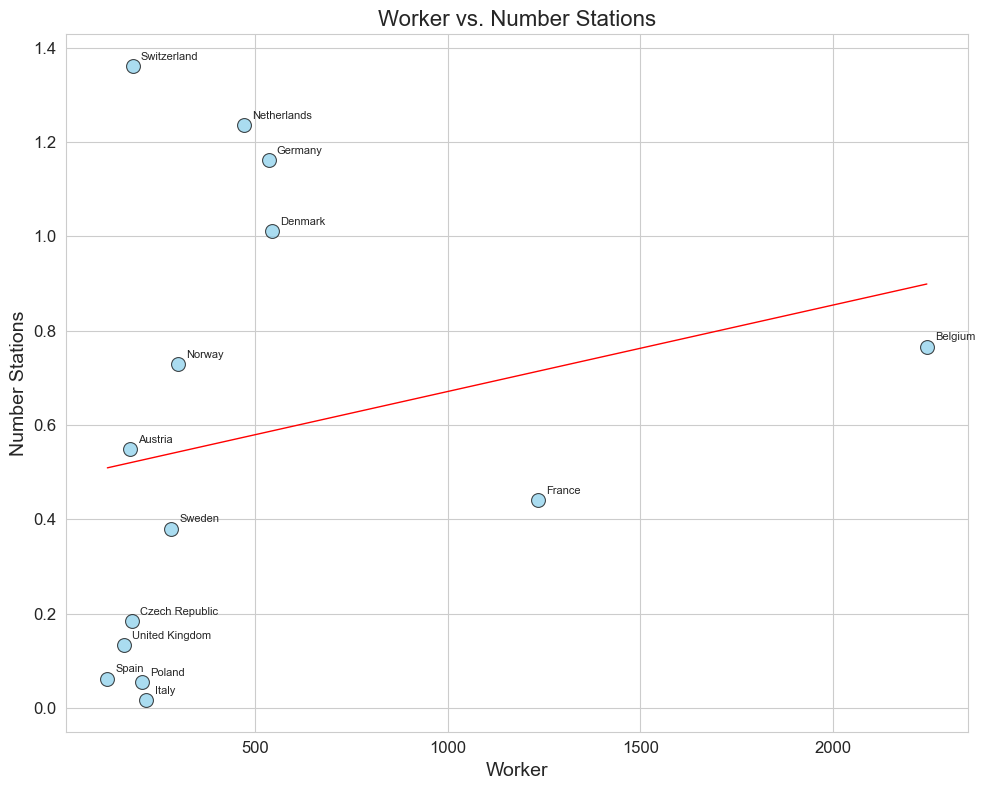

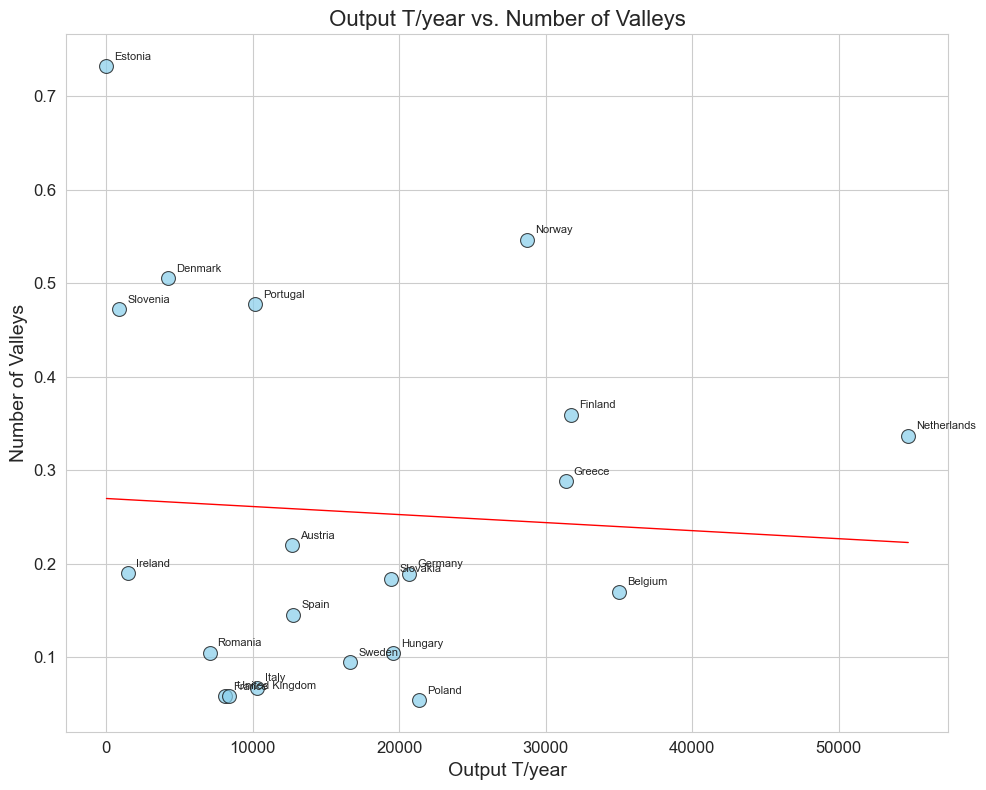

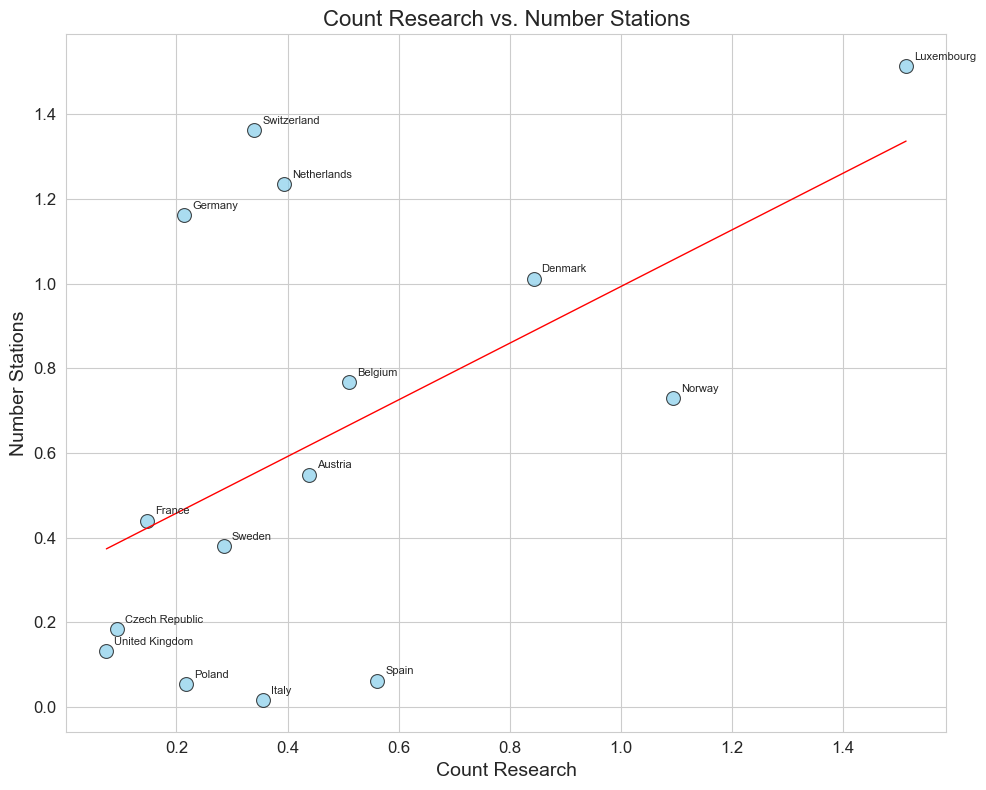

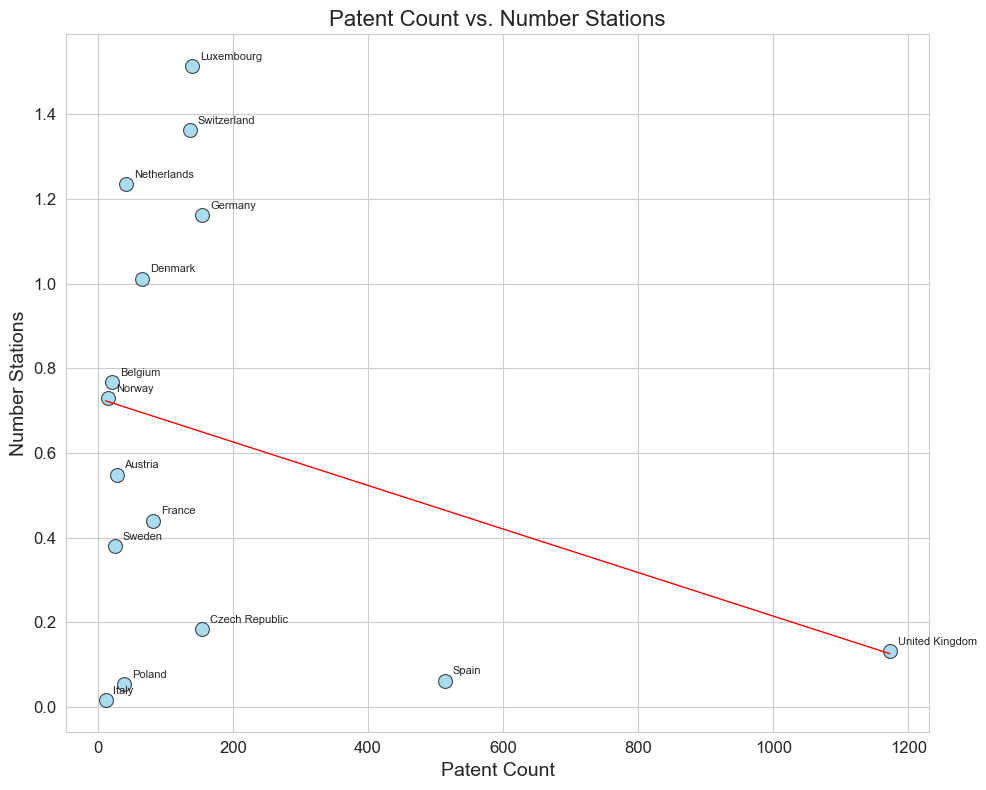

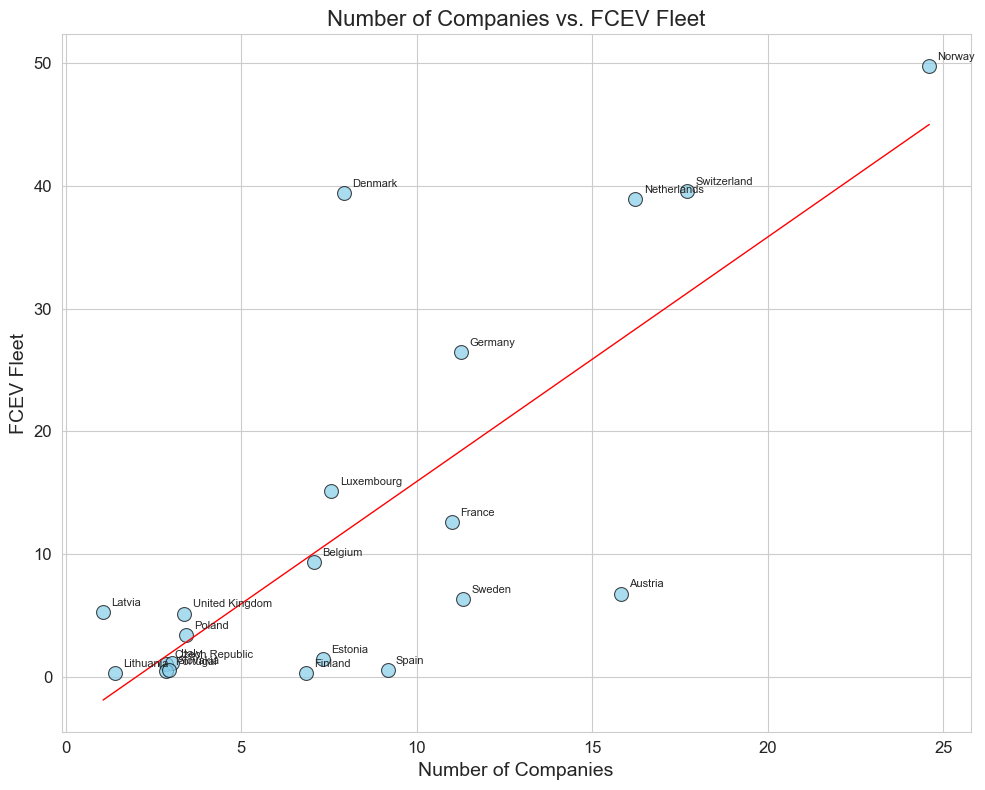

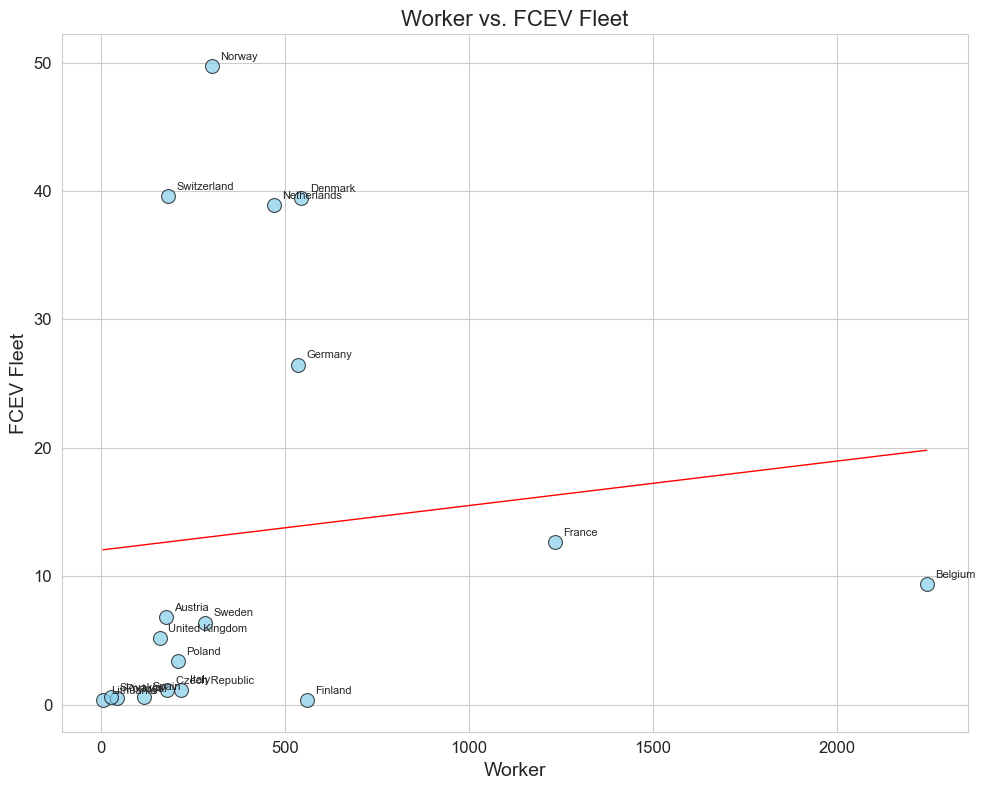

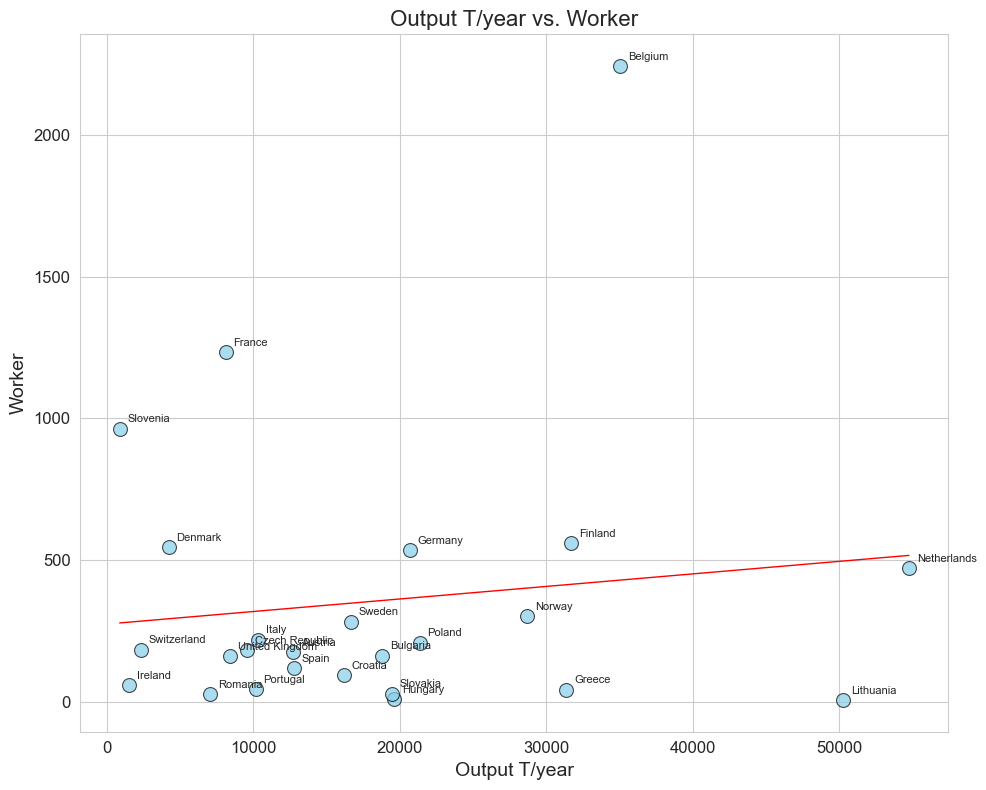

In [57]:
def create_correlation_plots(dataframe, var_pairs):
    for x_var, y_var in var_pairs:
        # Filter out rows with zero values in either x_var or y_var
        filtered_df = dataframe[(dataframe[x_var] != 0.0) & (dataframe[y_var] != 0.0)]

        plt.figure(figsize=(10, 8))
        sns.set_style("whitegrid")  # Set the style
        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black')  # Adjust marker size and color
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1})  # Adjust regression line

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_var].iloc[i] + x_offset, filtered_df[y_var].iloc[i] + y_offset, filtered_df['Country'].iloc[i], fontsize=8)  # Adjust label font size

        plt.title(f'{x_var} vs. {y_var}', fontsize=16)  # Adjust title font size
        plt.xlabel(x_var, fontsize=14)  # Adjust x-axis label font size
        plt.ylabel(y_var, fontsize=14)  # Adjust y-axis label font size
        plt.xticks(fontsize=12)  # Adjust tick label font size
        plt.yticks(fontsize=12)  # Adjust tick label font size
        plt.tight_layout()  # Adjust layout
        plt.show()

all_variable_pairs = [
    ('Output T/year', 'Total consumption'),
    ('Number Stations', 'FCEV Fleet'),
    ('Count Research', 'Patent Count'),
    ('Number of Companies', 'Total consumption'),
    ('Value (€/kg)', 'Output T/year'),
    ('Patent Count', 'FCEV Fleet'),
    ('Output T/year', 'Number Stations'),
    ('Total consumption', 'Value (€/kg)'),
    ('Number of Valleys', 'Total consumption'),
    ('Number Stations', 'Patent Count'),
    ('Number of Companies', 'Count Research'),
    ('Number of Valleys', 'FCEV Fleet'),
    ('Worker', 'Total consumption'),
    ('Worker', 'Number Stations'),
    ('Output T/year', 'Number of Valleys'),
    ('Count Research', 'Number Stations'),
    ('Patent Count', 'Number Stations'),
    ('Number of Companies', 'FCEV Fleet'),
    ('Worker', 'FCEV Fleet'),
    ('Output T/year', 'Worker')
]


# Create correlation plots
create_correlation_plots(per_million_df, all_variable_pairs)


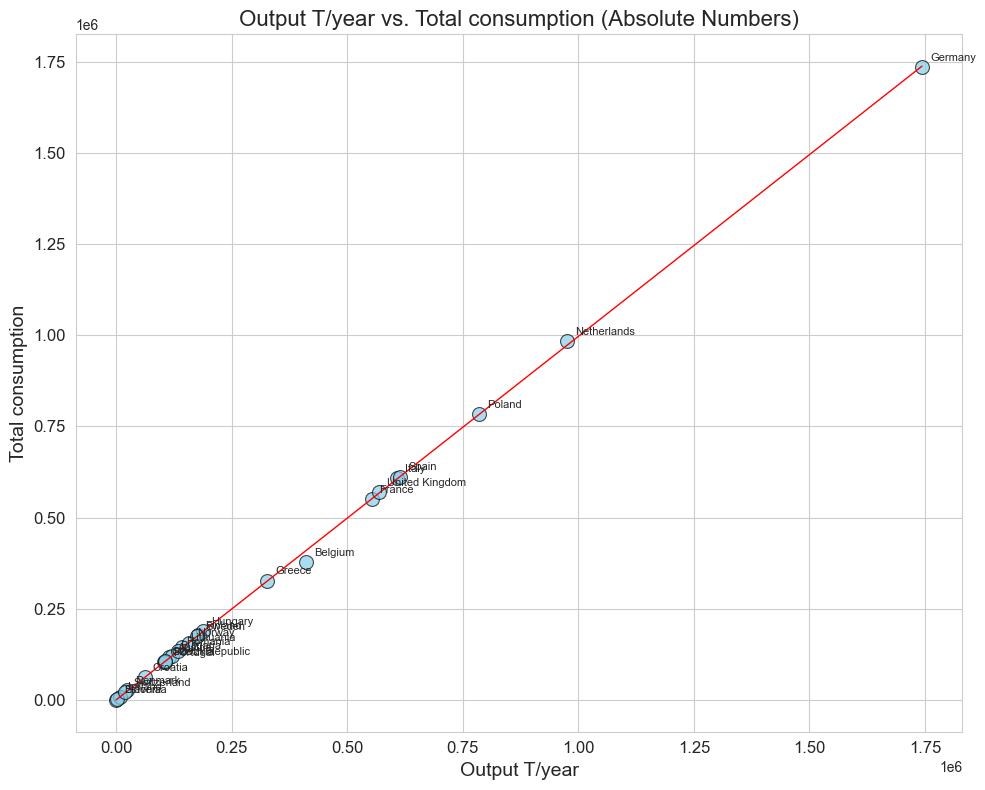

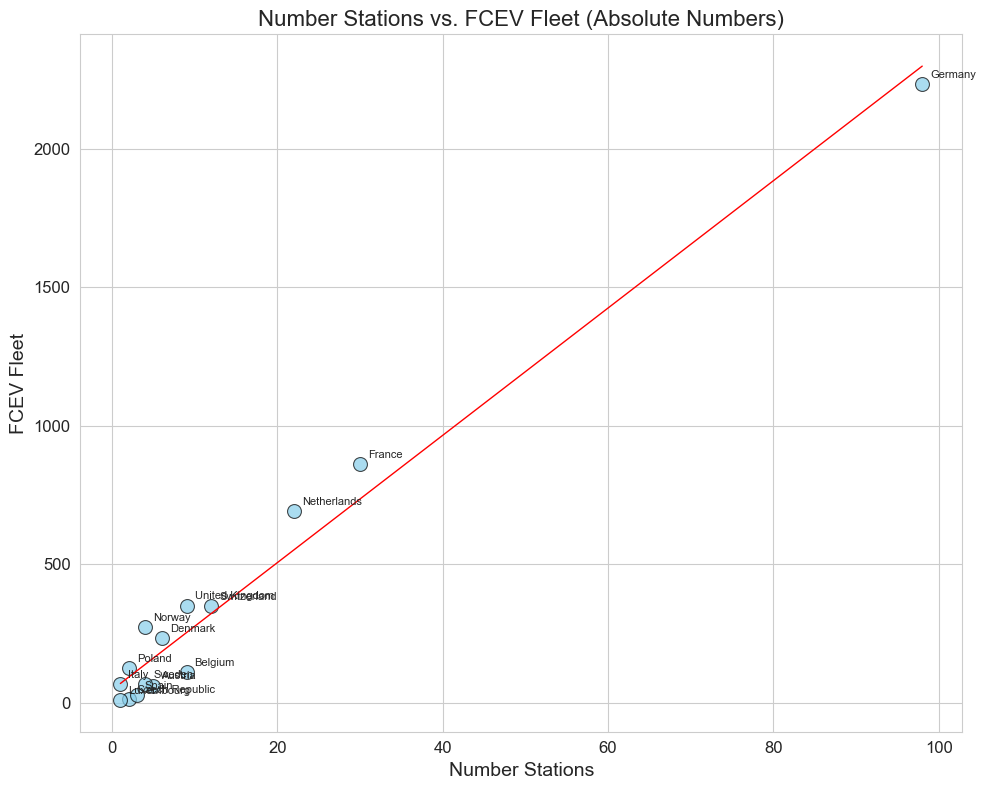

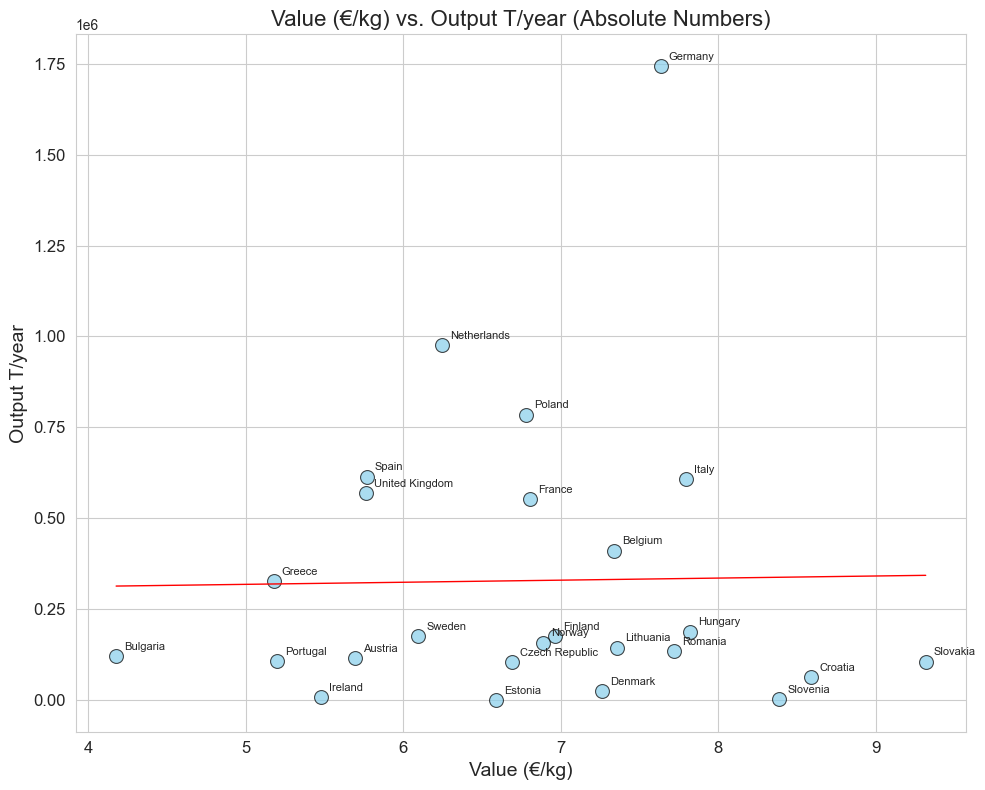

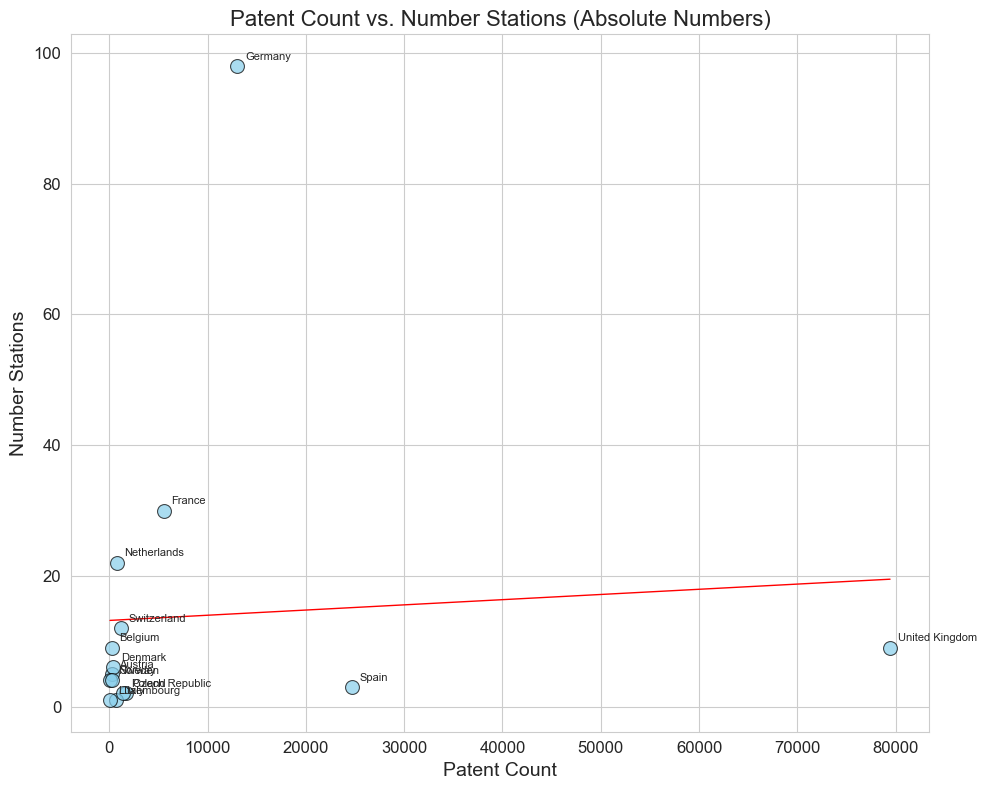

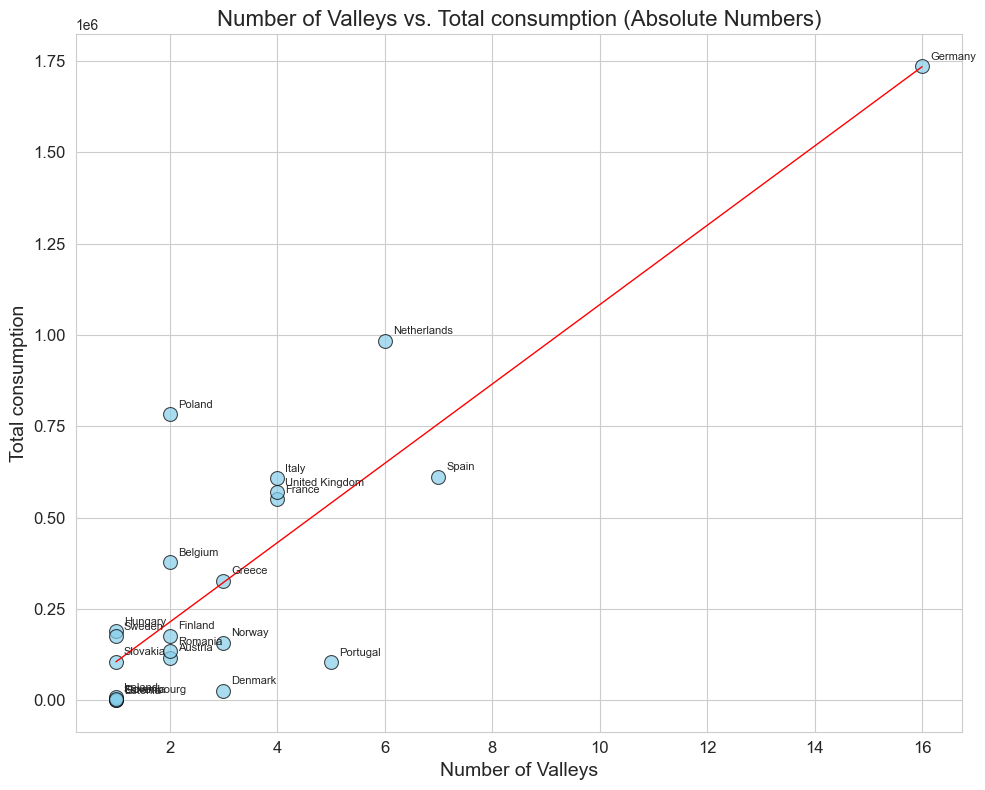

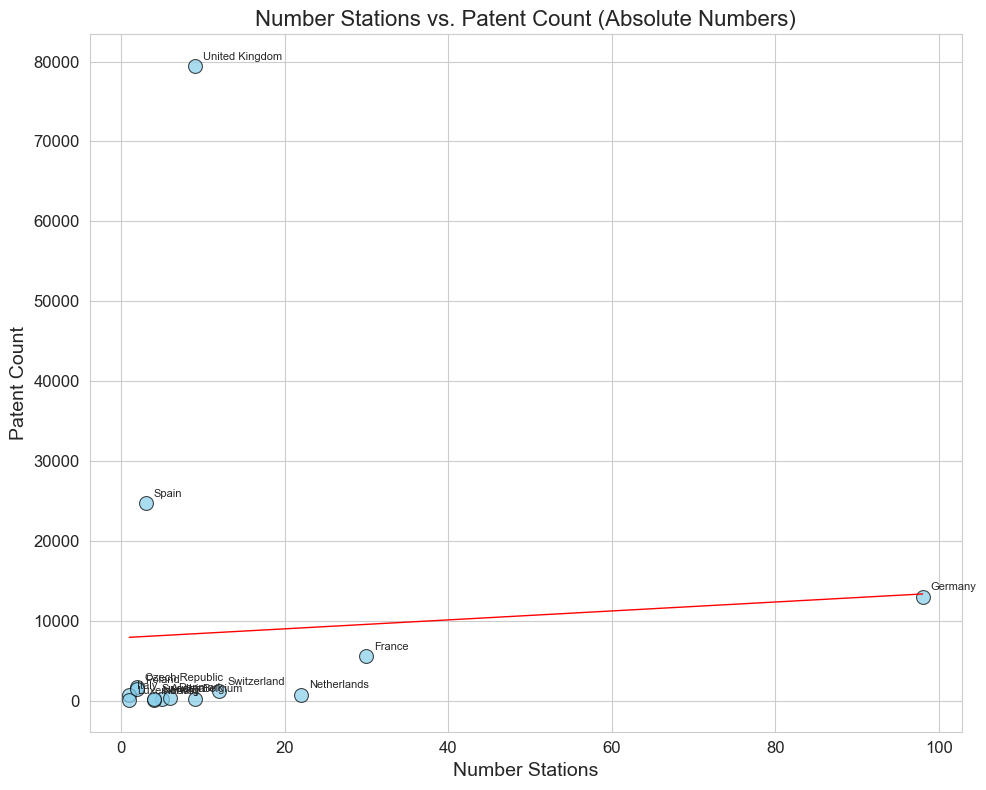

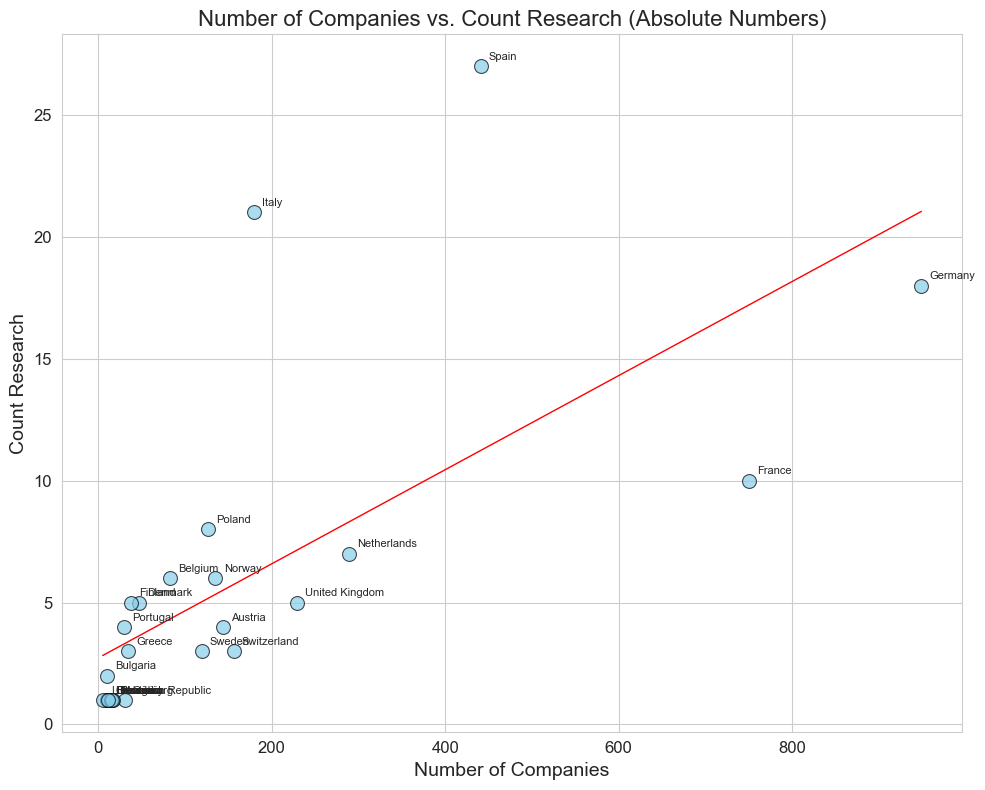

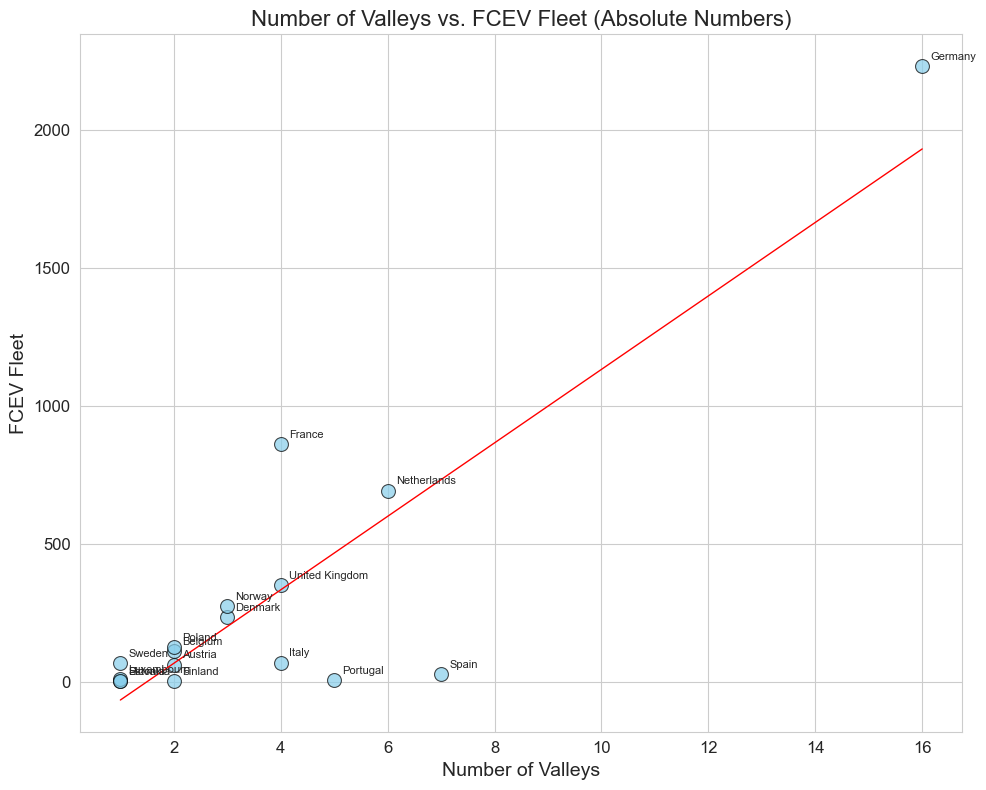

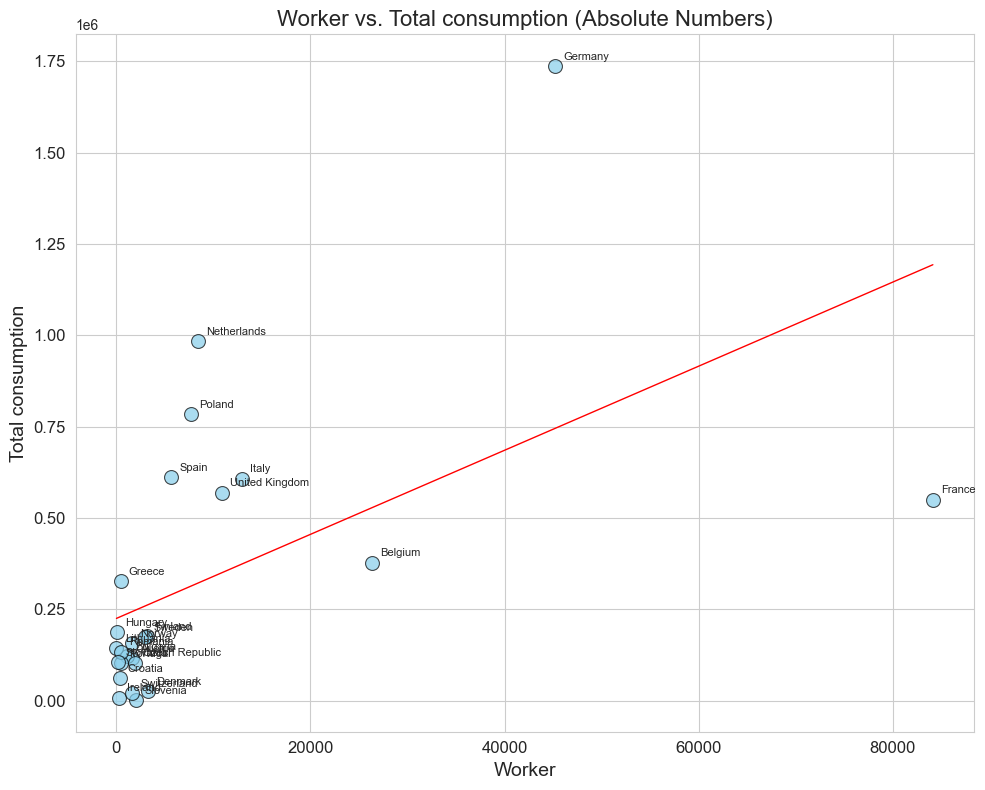

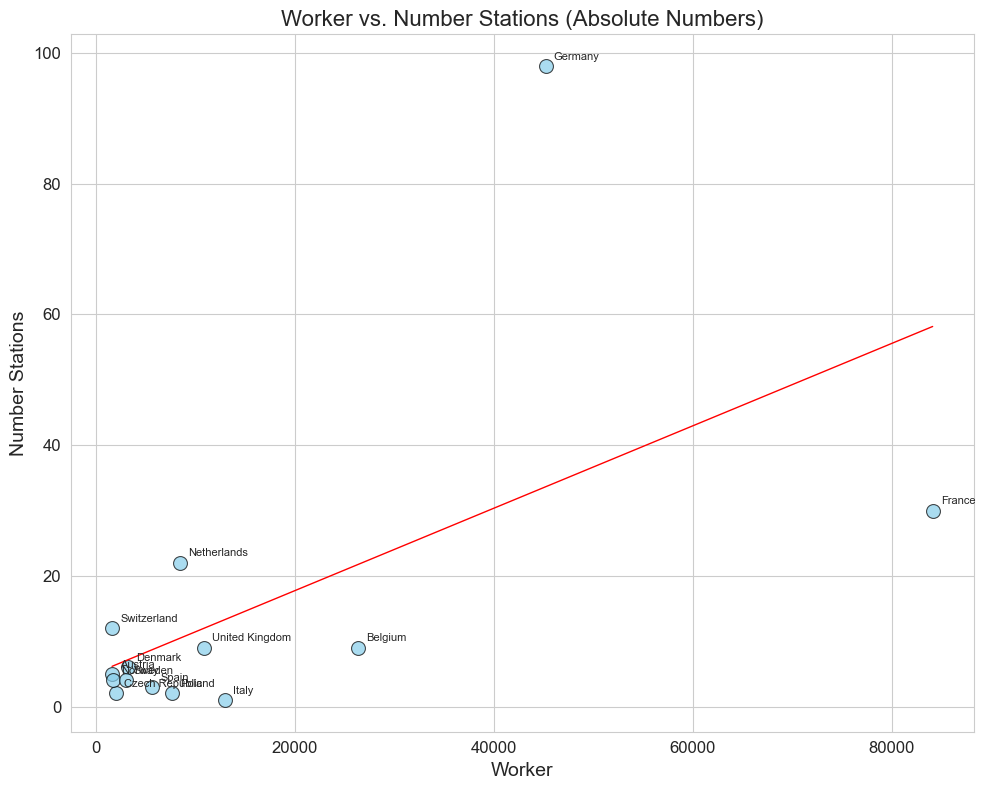

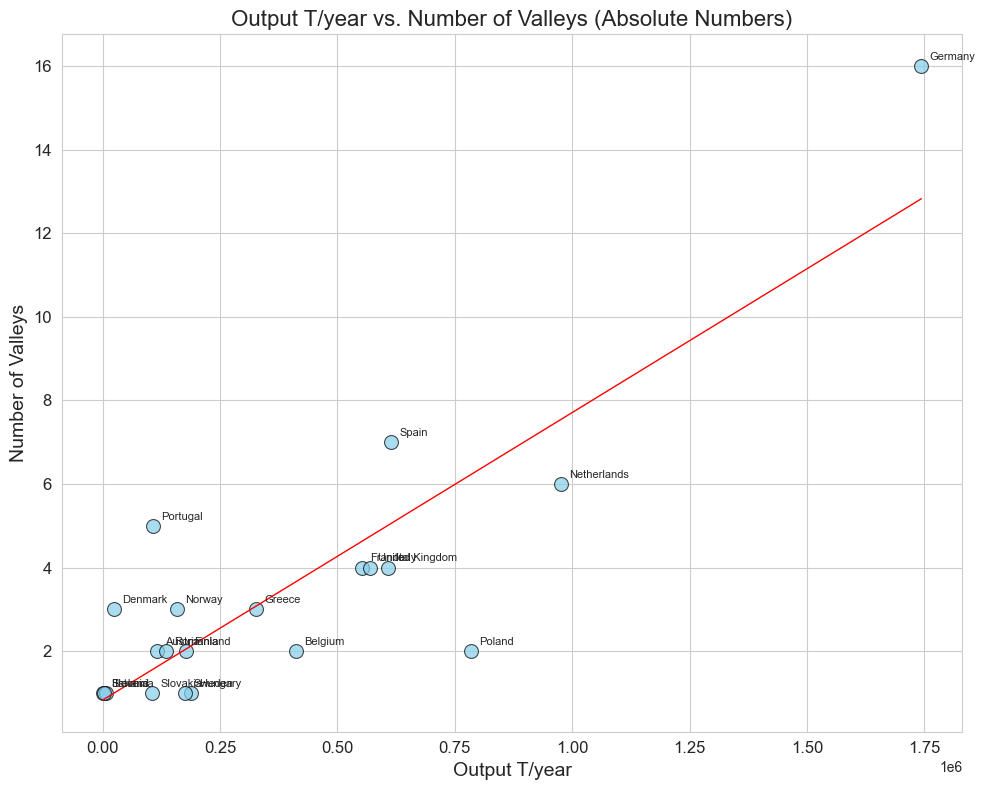

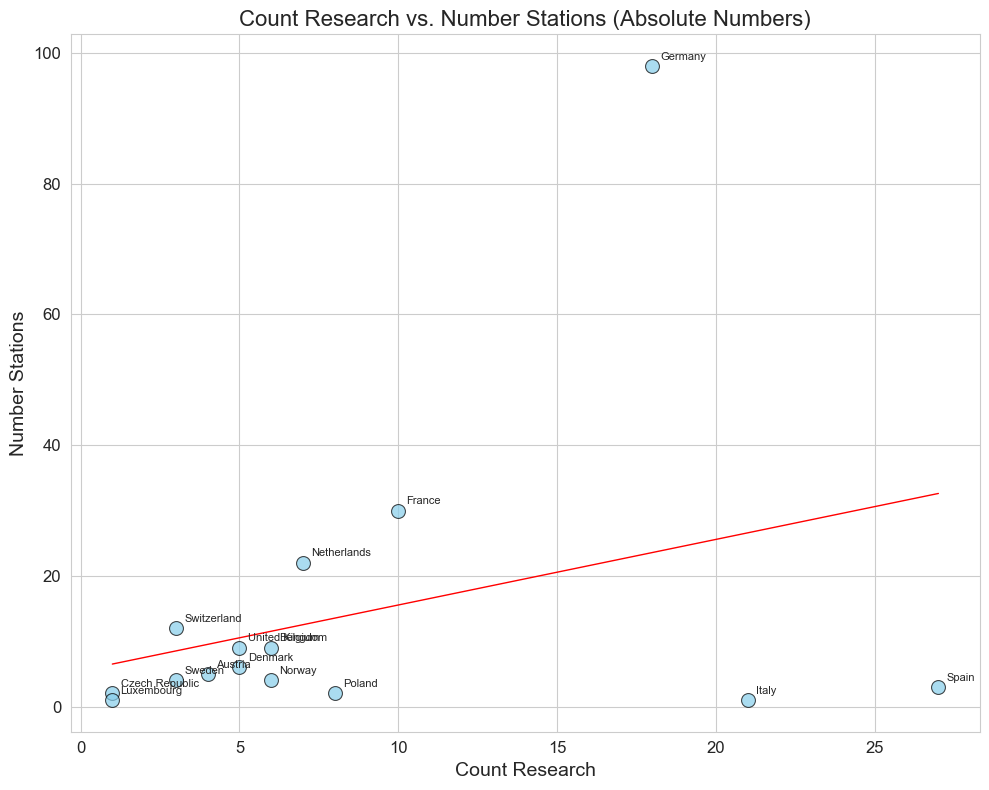

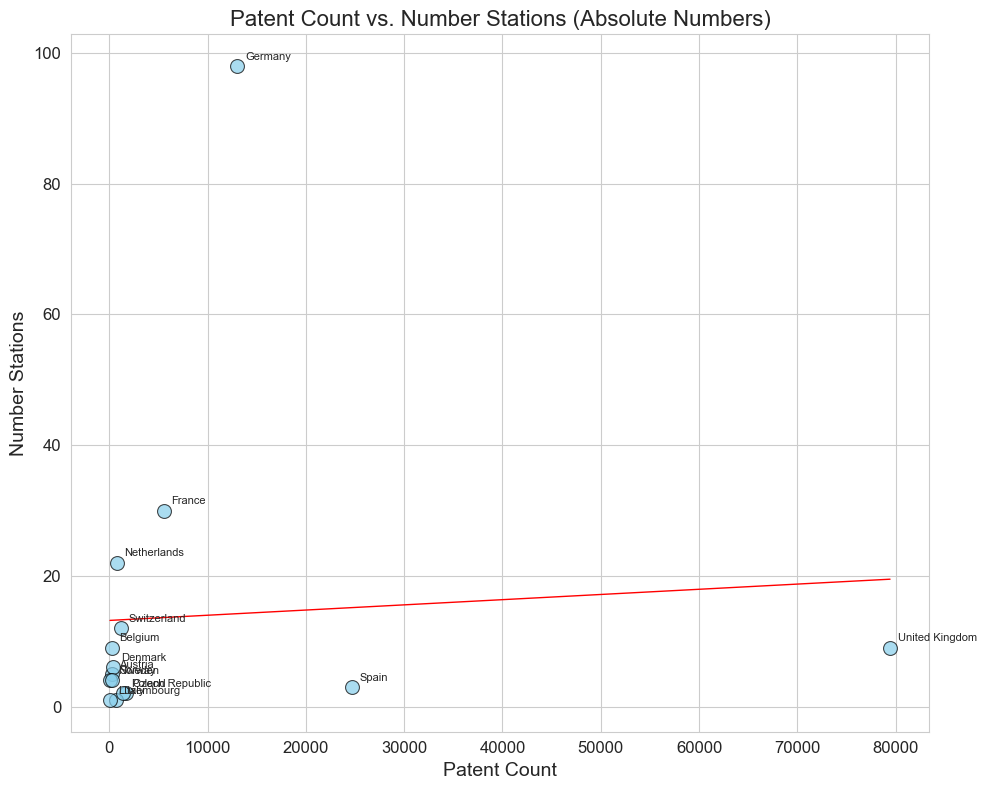

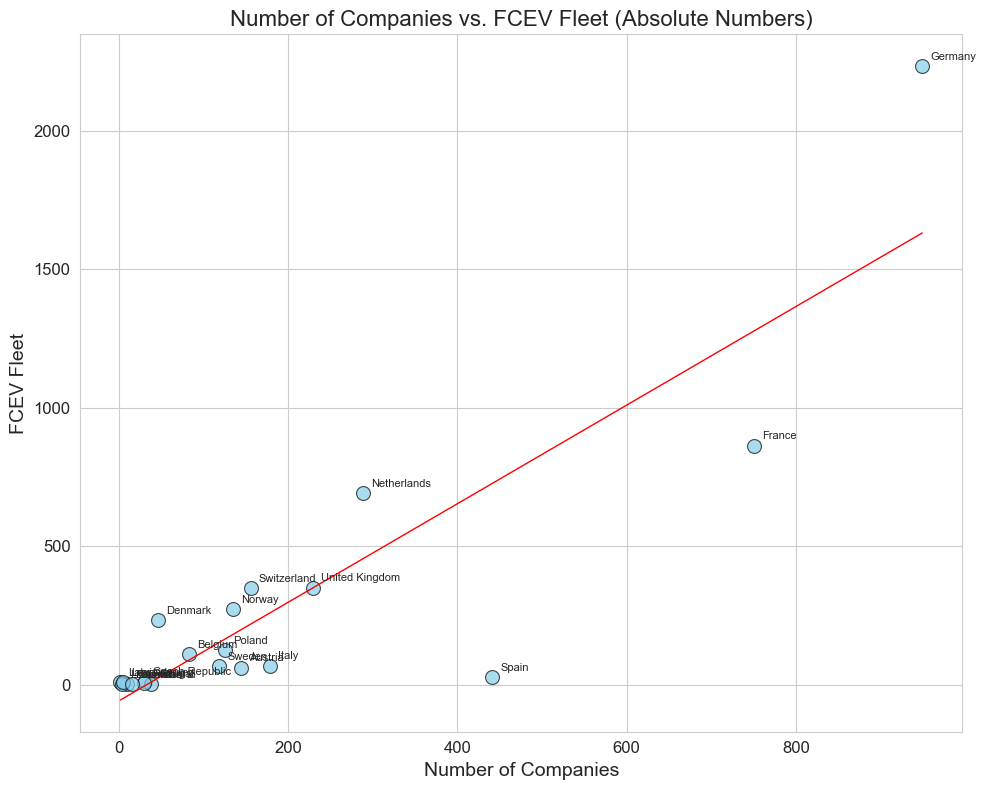

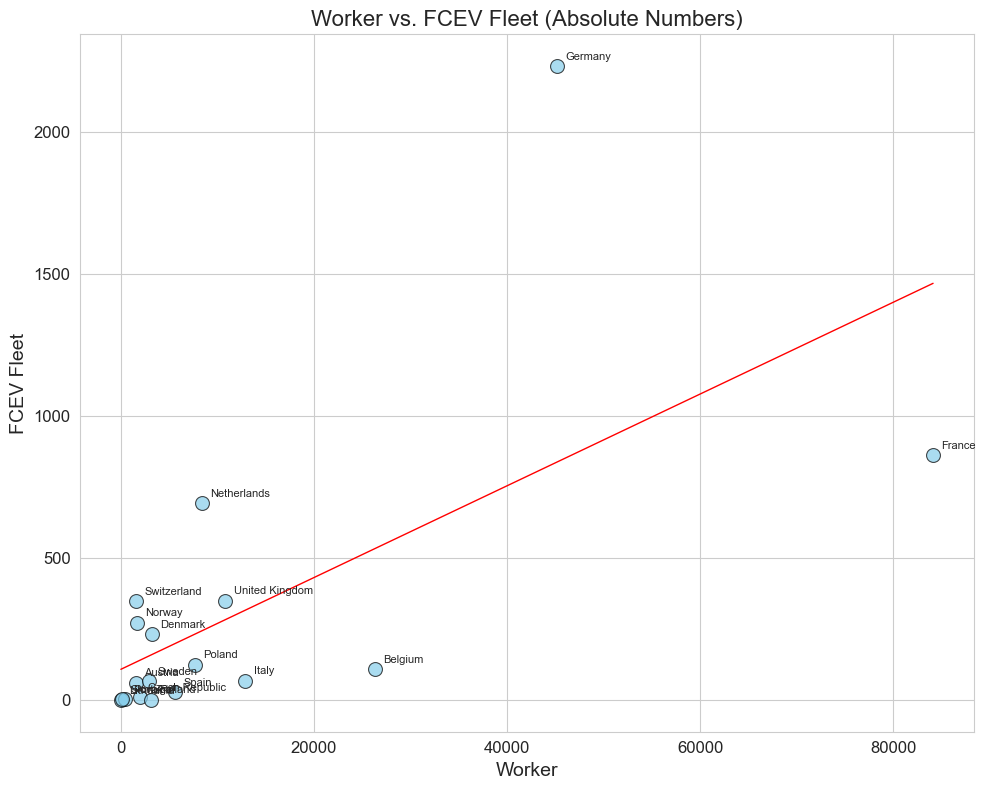

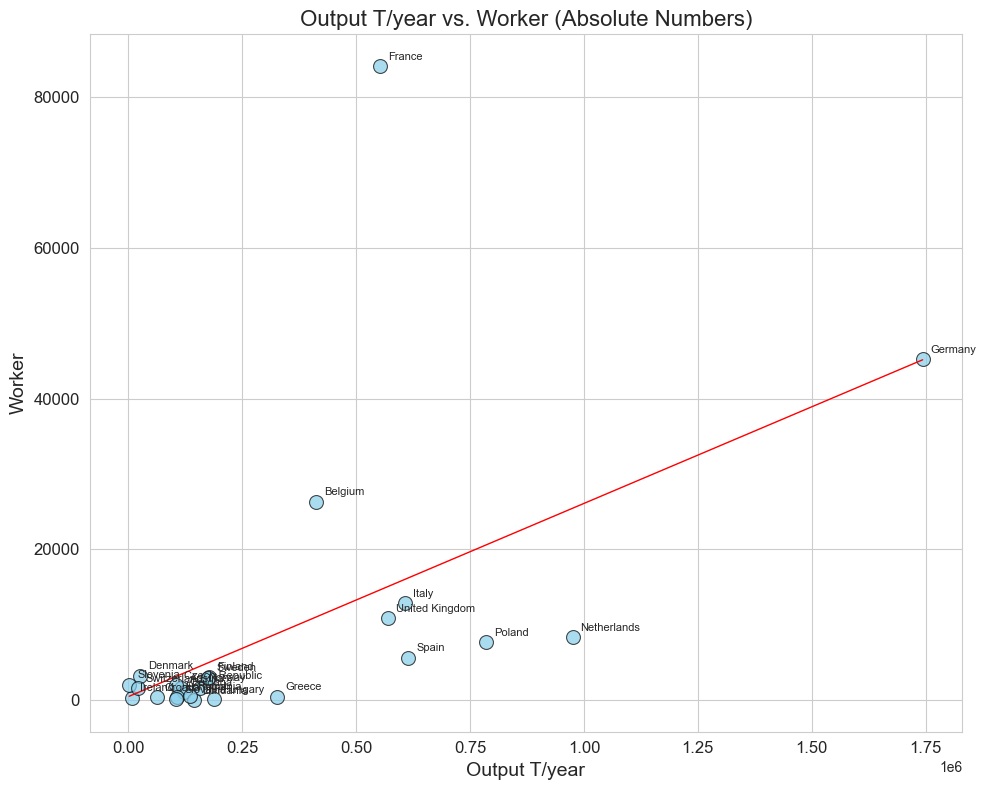

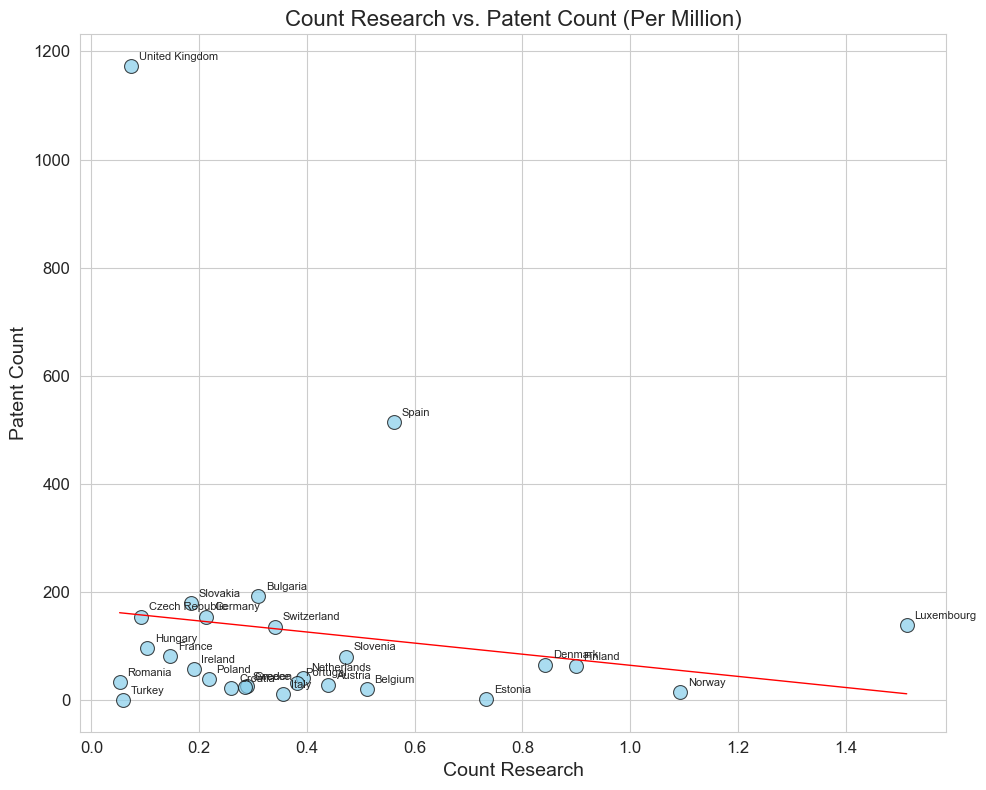

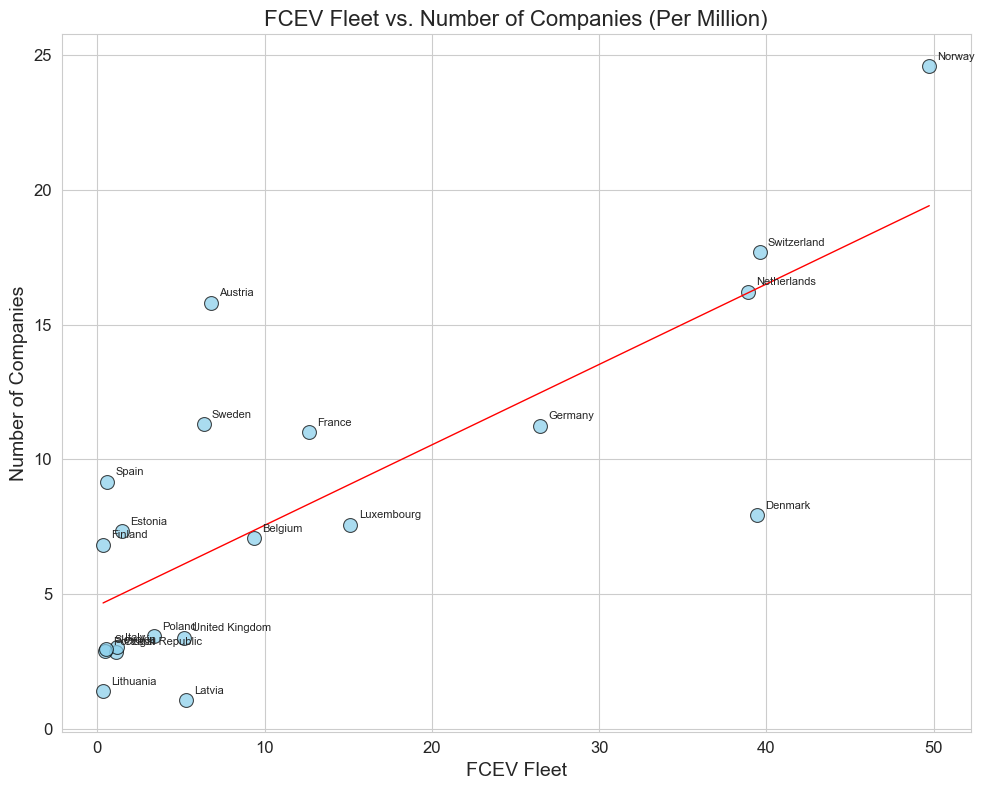

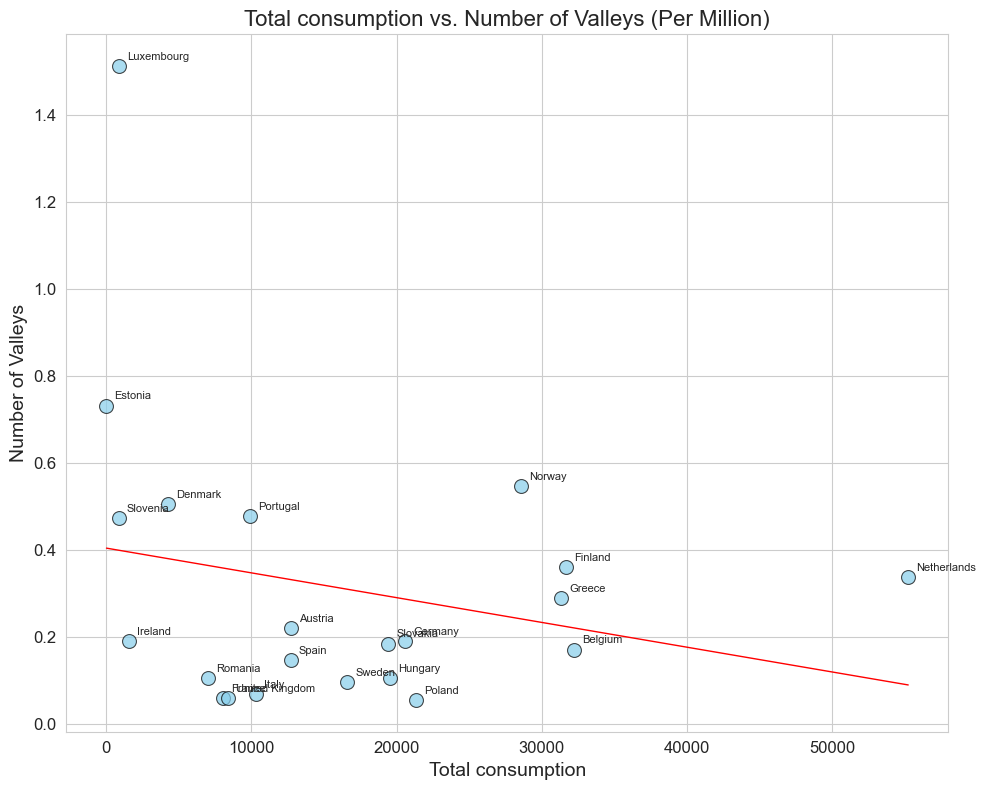

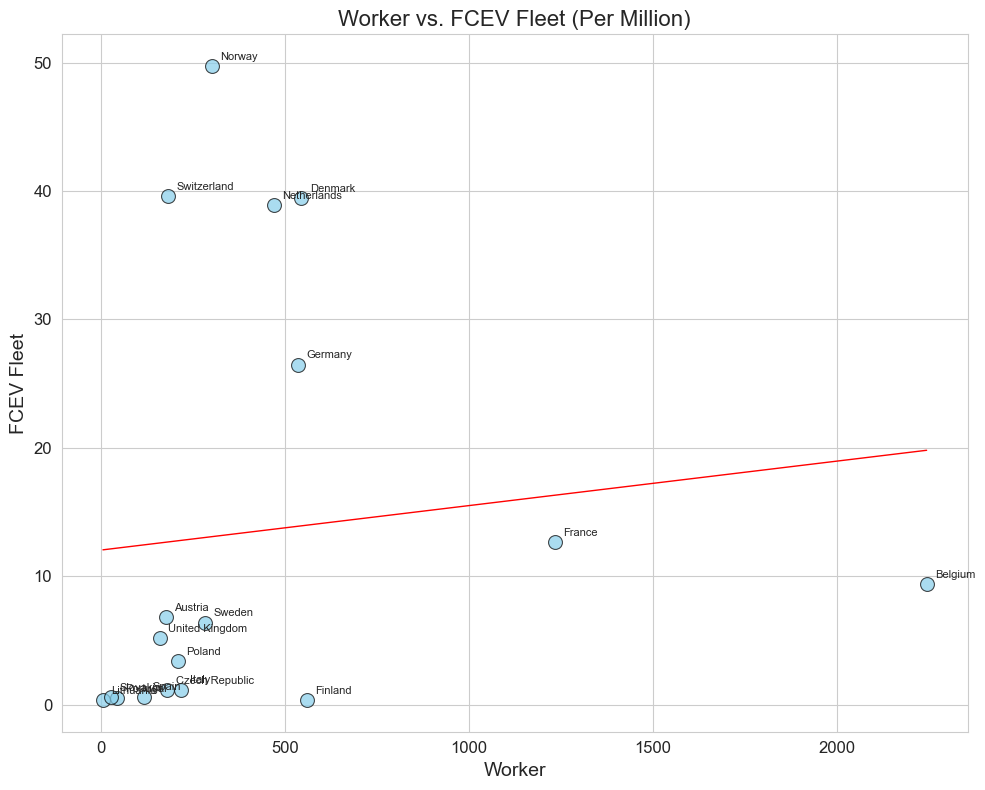

In [58]:
def create_correlation_plots(dataframe, var_pairs, title_suffix=""):
    for x_var, y_var in var_pairs:
        # Filter out rows with zero values in either x_var or y_var
        filtered_df = dataframe[(dataframe[x_var] != 0.0) & (dataframe[y_var] != 0.0)]

        plt.figure(figsize=(10, 8))
        sns.set_style("whitegrid")  # Set the style
        sns.scatterplot(x=x_var, y=y_var, data=filtered_df, s=100, alpha=0.7, color='skyblue', edgecolor='black')  # Adjust marker size and color
        sns.regplot(x=x_var, y=y_var, data=filtered_df, scatter=False, color='red', ci=None, line_kws={"linewidth": 1})  # Adjust regression line

        # Calculate offset based on data range of filtered data
        x_range = filtered_df[x_var].max() - filtered_df[x_var].min()
        y_range = filtered_df[y_var].max() - filtered_df[y_var].min()
        x_offset = x_range * 0.01
        y_offset = y_range * 0.01

        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_var].iloc[i] + x_offset, filtered_df[y_var].iloc[i] + y_offset, filtered_df['Country'].iloc[i], fontsize=8)  # Adjust label font size

        plt.title(f'{x_var} vs. {y_var} {title_suffix}', fontsize=16)  # Adjust title font size
        plt.xlabel(x_var, fontsize=14)  # Adjust x-axis label font size
        plt.ylabel(y_var, fontsize=14)  # Adjust y-axis label font size
        plt.xticks(fontsize=12)  # Adjust tick label font size
        plt.yticks(fontsize=12)  # Adjust tick label font size
        plt.tight_layout()  # Adjust layout
        plt.show()

# Variable pairs for absolute analysis
absolute_pairs = [
    ('Output T/year', 'Total consumption'),
    ('Number Stations', 'FCEV Fleet'),
    ('Value (€/kg)', 'Output T/year'),
    ('Patent Count', 'Number Stations'),
    ('Number of Valleys', 'Total consumption'),
    ('Number Stations', 'Patent Count'),
    ('Number of Companies', 'Count Research'),
    ('Number of Valleys', 'FCEV Fleet'),
    ('Worker', 'Total consumption'),
    ('Worker', 'Number Stations'),
    ('Output T/year', 'Number of Valleys'),
    ('Count Research', 'Number Stations'),
    ('Patent Count', 'Number Stations'),
    ('Number of Companies', 'FCEV Fleet'),
    ('Worker', 'FCEV Fleet'),
    ('Output T/year', 'Worker')
]

# Variable pairs for per million analysis
per_million_pairs = [
    ('Count Research', 'Patent Count'),
    ('FCEV Fleet', 'Number of Companies'),
    ('Total consumption', 'Number of Valleys'),
    ('Worker', 'FCEV Fleet')
]

# Create plots for absolute numbers
create_correlation_plots(merged_df, absolute_pairs, title_suffix="(Absolute Numbers)")

# Create plots for per million numbers
create_correlation_plots(per_million_df, per_million_pairs, title_suffix="(Per Million)")


In [72]:
#print the columns of the dataframe
print(merged_df_index.columns)

Index(['Country', 'Output T/year', 'Total consumption', 'Count Research',
       'Patent Count', 'Number Stations', 'Value (€/kg)', 'FCEV Fleet', '2023',
       'per_million', 'Worker', 'Number of Companies', 'Number of Valleys',
       'GHG intensity', 'Competitiveness', 'Re_share'],
      dtype='object')


In [52]:
# Step 3: Value Chain Analysis
value_chain_steps = {
    'Production': ['Output T/year'],
    'Costs': ['Value (€/kg)'],
    'Demand': ['Total consumption'],
    'Research': ['Count Research'],
    'Innovation': ['Patent Count'],
    'Infrastructure': ['Number Stations'],
    'Usage ': ['FCEV Fleet'],
    'Companies': ['Number of Companies']
}

relative_distribution = {}

for step, columns in value_chain_steps.items():
    relative_distribution[step] = merged_df[columns].sum(axis=1) / merged_df[columns].sum(axis=1).sum()
    print(f'{step}: {relative_distribution[step]}')


Production: 0     0.014029
1     0.049962
2     0.014722
3     0.007571
4     0.000000
5     0.012619
6     0.003032
7     0.000002
8     0.021436
9     0.067164
10    0.211825
11    0.039675
12    0.022841
13    0.000955
14    0.073857
15    0.000000
16    0.017457
17    0.000000
18    0.000000
19    0.118485
20    0.019149
21    0.095328
22    0.012913
23    0.016321
24    0.012829
25    0.000224
26    0.074654
27    0.021306
28    0.002497
29    0.000000
30    0.069146
dtype: float64
Costs: 0     0.028600
1     0.036854
2     0.020982
3     0.043151
4     0.032076
5     0.033592
6     0.036466
7     0.033091
8     0.034969
9     0.034196
10    0.038346
11    0.026007
12    0.039287
13    0.027516
14    0.039147
15    0.039080
16    0.036956
17    0.048204
18    0.029140
19    0.031376
20    0.034582
21    0.034050
22    0.026116
23    0.038760
24    0.046802
25    0.042123
26    0.028972
27    0.030609
28    0.000000
29    0.000000
30    0.028951
dtype: float64
Demand: 0     0.01417

In [53]:
relative_distribution = pd.DataFrame(relative_distribution)
relative_distribution.index = merged_df['Country']
relative_distribution

relative_distribution.sum(axis=0)

Production        1.0
Costs             1.0
Demand            1.0
Research          1.0
Innovation        1.0
Infrastructure    1.0
Usage             1.0
Companies         1.0
dtype: float64

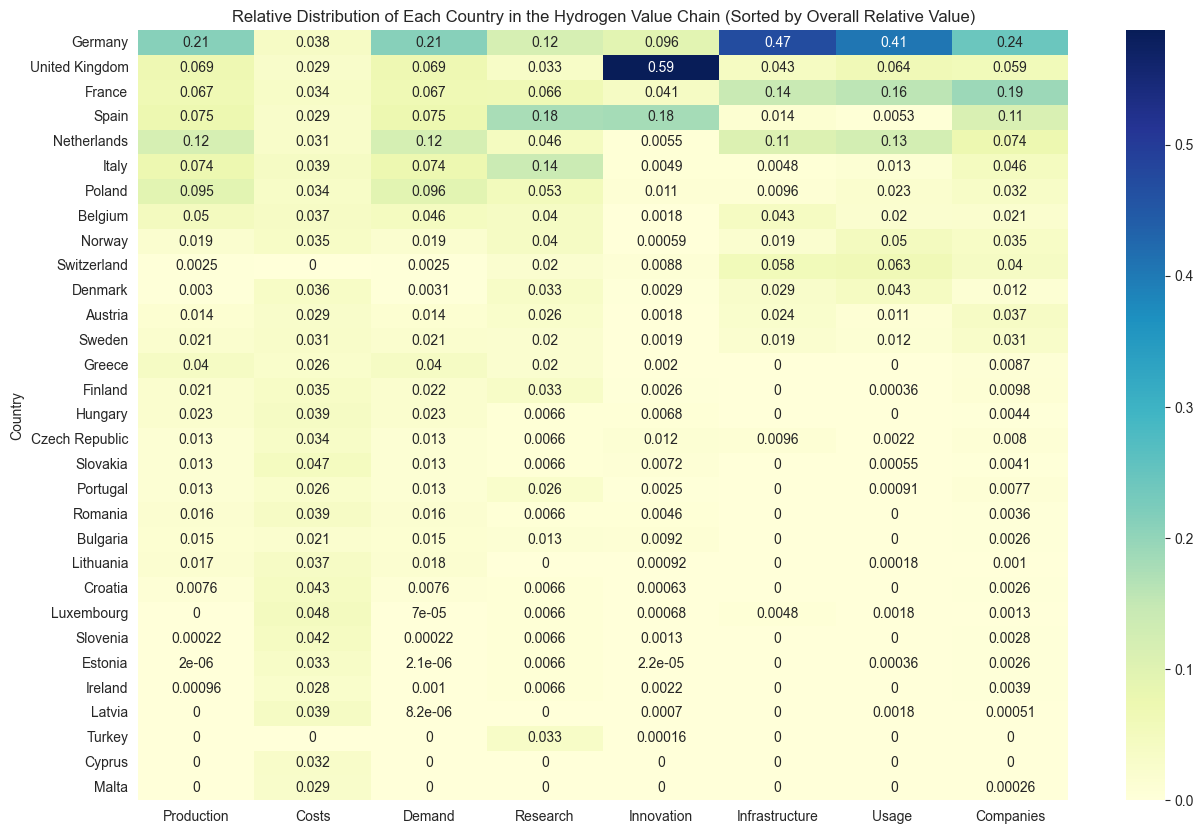

In [54]:
# Calculate the sum of each row
relative_distribution['row_sum'] = relative_distribution.sum(axis=1)

# Sort the DataFrame based on the row sum in descending order
relative_distribution_sorted = relative_distribution.sort_values(by='row_sum', ascending=False).drop(columns='row_sum')

# Plotting heatmap with sorted rows and rotated y-axis tick labels
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(relative_distribution_sorted, cmap='YlGnBu', annot=True, ax=ax)
ax.set_title('Relative Distribution of Each Country in the Hydrogen Value Chain (Sorted by Overall Relative Value)')
plt.yticks(rotation=0)  # Rotate y-axis tick labels to be horizontal
plt.show()

In [90]:
#give plot as png  
fig.savefig('relative_distribution.png')